In [10]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore')

# Problem 2: Logistic Regression, LDA and CART

In [144]:
df2 = pd.read_excel("Contraceptive_method_dataset.xlsx")

In [145]:
df2.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [146]:
df2.tail()

Wife_age Wife_ education Husband_education  No_of_children_born  \
1468      33.0        Tertiary          Tertiary                  NaN   
1469      33.0        Tertiary          Tertiary                  NaN   
1470      39.0       Secondary         Secondary                  NaN   
1471      33.0       Secondary         Secondary                  NaN   
1472      17.0       Secondary         Secondary                  1.0   

     Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
1468   Scientology          Yes                   2                Very High   
1469   Scientology           No                   1                Very High   
1470   Scientology          Yes                   1                Very High   
1471   Scientology          Yes                   2                      Low   
1472   Scientology           No                   2                Very High   

     Media_exposure  Contraceptive_method_used  
1468         Exposed                       Yes  
1469         Exposed                       Yes  
1470         Exposed                       Yes  
1471         Exposed                       Yes  
1472         Exposed                       Yes

In [147]:
df2.shape

(1473, 10)

In [148]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [149]:
df2.describe().T

count       mean       std   min   25%   50%   75%   max
Wife_age             1402.0  32.606277  8.274927  16.0  26.0  32.0  39.0  49.0
No_of_children_born  1452.0   3.254132  2.365212   0.0   1.0   3.0   4.0  16.0
Husband_Occupation   1473.0   2.137814  0.864857   1.0   1.0   2.0   3.0   4.0

In [150]:
df2.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [151]:
df2.duplicated().sum()

80

In [152]:
for column in df2.columns:
    counts = df2[column].value_counts()
    print(f"Value counts for {column}:\n{counts}\n")

Value counts for Wife_age:
Wife_age
25.0    77
26.0    66
32.0    62
24.0    60
35.0    59
29.0    58
30.0    58
28.0    58
22.0    55
27.0    55
33.0    52
36.0    49
37.0    48
34.0    46
21.0    44
23.0    43
31.0    43
38.0    43
47.0    41
45.0    40
42.0    38
44.0    38
39.0    34
43.0    34
40.0    34
41.0    32
48.0    30
20.0    27
49.0    23
46.0    21
19.0    17
17.0     8
18.0     6
16.0     3
Name: count, dtype: int64

Value counts for Wife_ education:
Wife_ education
Tertiary      577
Secondary     410
Primary       334
Uneducated    152
Name: count, dtype: int64

Value counts for Husband_education:
Husband_education
Tertiary      899
Secondary     352
Primary       178
Uneducated     44
Name: count, dtype: int64

Value counts for No_of_children_born:
No_of_children_born
2.0     274
1.0     273
3.0     255
4.0     192
5.0     131
0.0      97
6.0      90
7.0      49
8.0      46
9.0      16
10.0     11
11.0     11
12.0      4
13.0      2
16.0      1
Name: count, dtype: int

In [153]:
#df2['Husband_Occupation'] = df2['Husband_Occupation'].astype(str)

In [154]:
# Select numerical columns
num_columns2 = df2.select_dtypes(include=['int64', 'float64']).columns

# Select categorical columns
cat_columns2 = df2.select_dtypes(include=['object', 'category']).columns

In [155]:
num_columns2

Index(['Wife_age', 'No_of_children_born', 'Husband_Occupation'], dtype='object')

In [156]:
cat_columns2

Index(['Wife_ education', 'Husband_education', 'Wife_religion', 'Wife_Working',
       'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

# Uni-variate Analysis

# Categorical

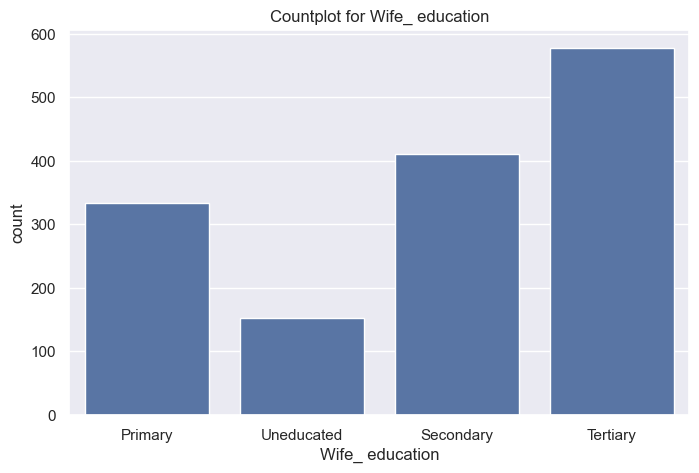

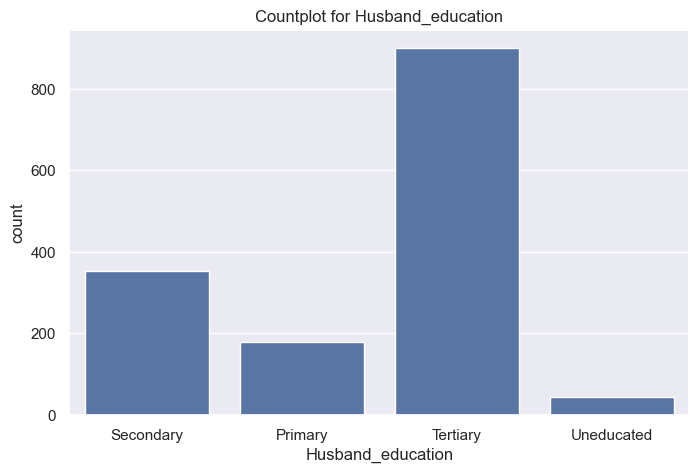

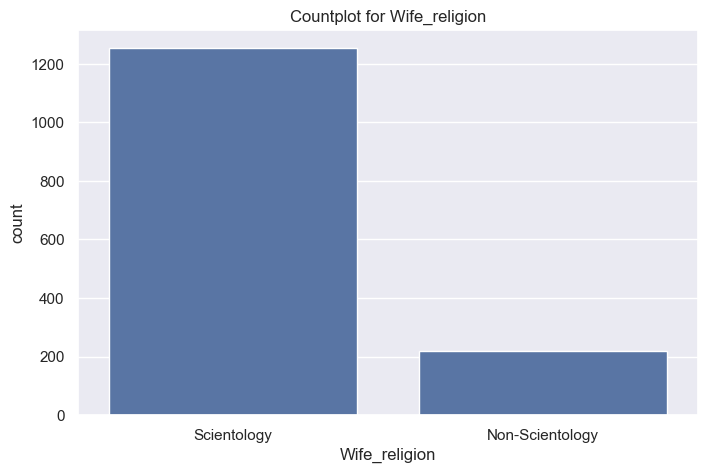

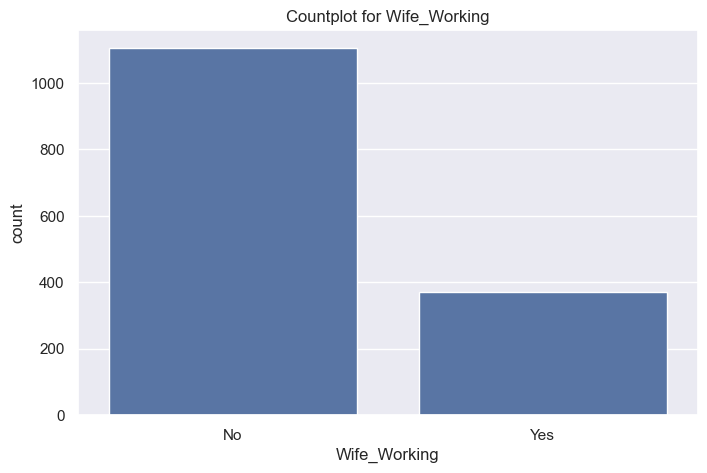

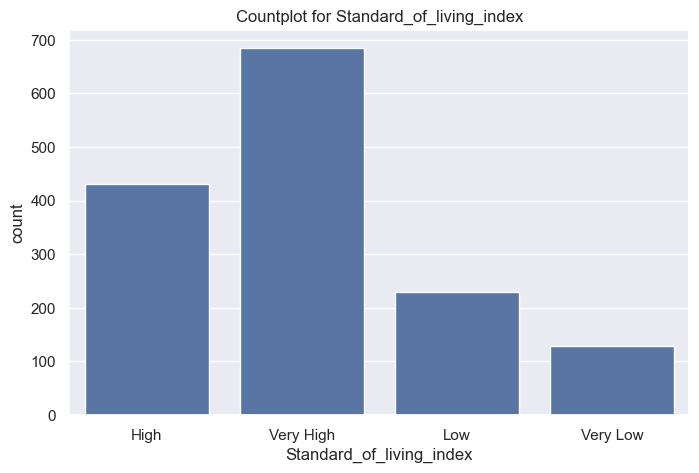

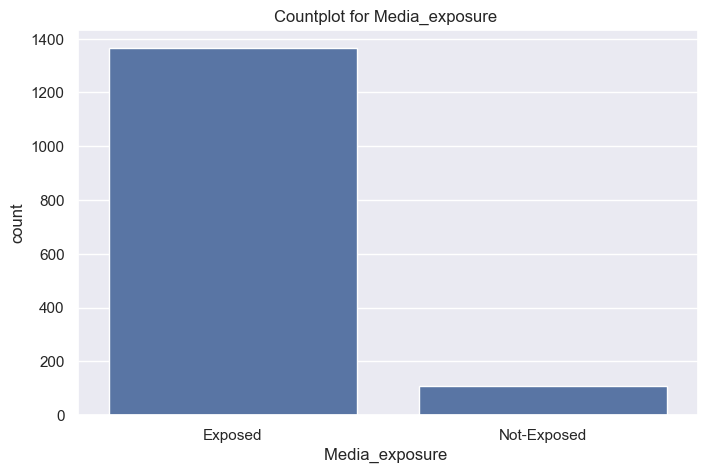

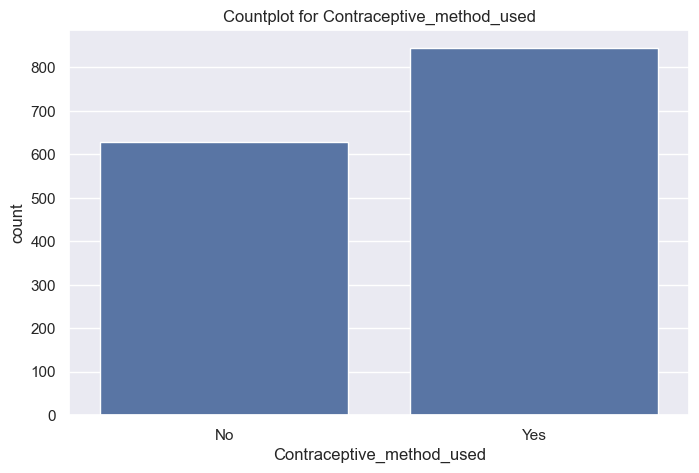

<Figure size 1570x2027 with 0 Axes>

In [157]:
# Loop through the selected columns and draw countplots on individual subplots
for i, column in enumerate(cat_columns2):
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.countplot(x=column, data=df2, ax=ax)
    ax.set_title(f'Countplot for {column}')
    plt.show()

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()

In [158]:
# Loop through the selected columns
for column in cat_columns2:
    count_info = df2[column].value_counts()
    print(f'Count information for {column}:\n{count_info}\n{"="*30}\n')


Count information for Wife_ education:
Wife_ education
Tertiary      577
Secondary     410
Primary       334
Uneducated    152
Name: count, dtype: int64

Count information for Husband_education:
Husband_education
Tertiary      899
Secondary     352
Primary       178
Uneducated     44
Name: count, dtype: int64

Count information for Wife_religion:
Wife_religion
Scientology        1253
Non-Scientology     220
Name: count, dtype: int64

Count information for Wife_Working:
Wife_Working
No     1104
Yes     369
Name: count, dtype: int64

Count information for Standard_of_living_index:
Standard_of_living_index
Very High    684
High         431
Low          229
Very Low     129
Name: count, dtype: int64

Count information for Media_exposure :
Media_exposure 
Exposed        1364
Not-Exposed     109
Name: count, dtype: int64

Count information for Contraceptive_method_used:
Contraceptive_method_used
Yes    844
No     629
Name: count, dtype: int64



# Numerical

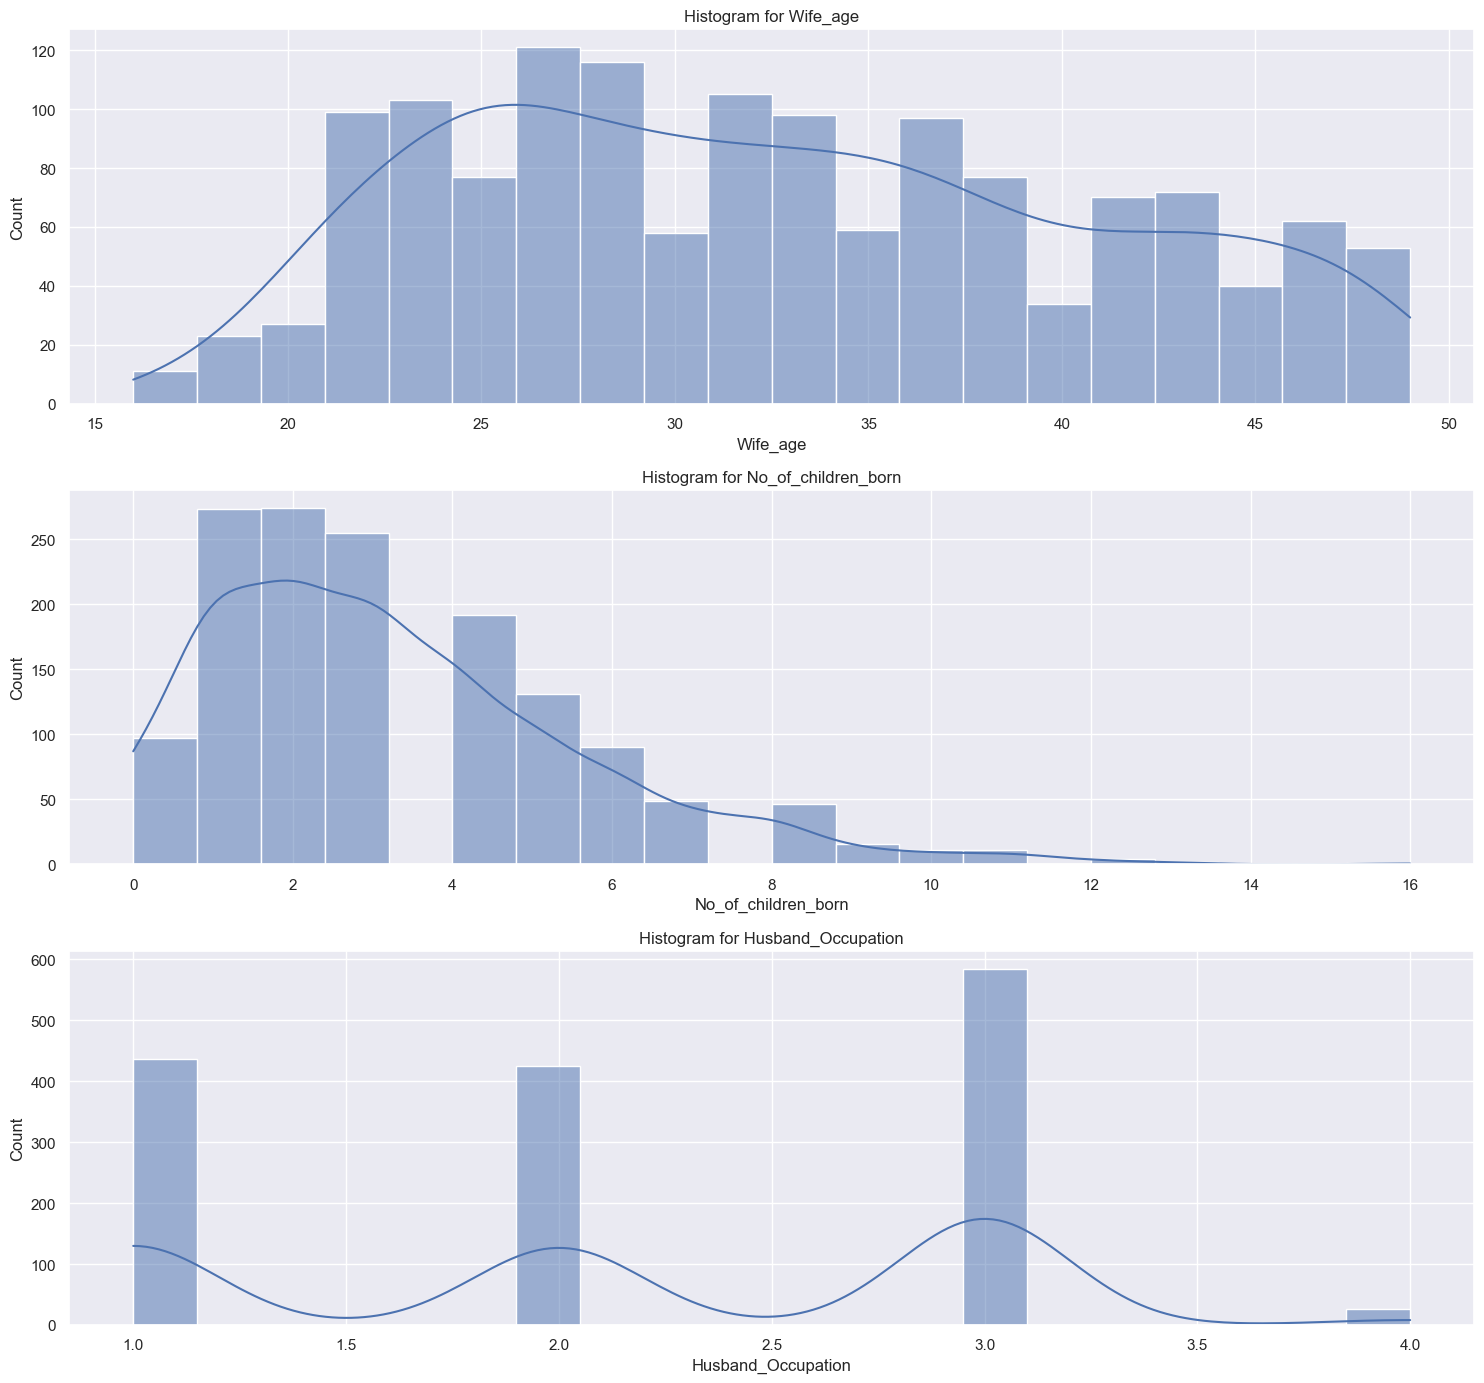

In [159]:
# Set up subplots dynamically
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 14))

# Draw histplot for each numerical column
for i, column in enumerate(num_columns2):
    sns.histplot(df2[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()


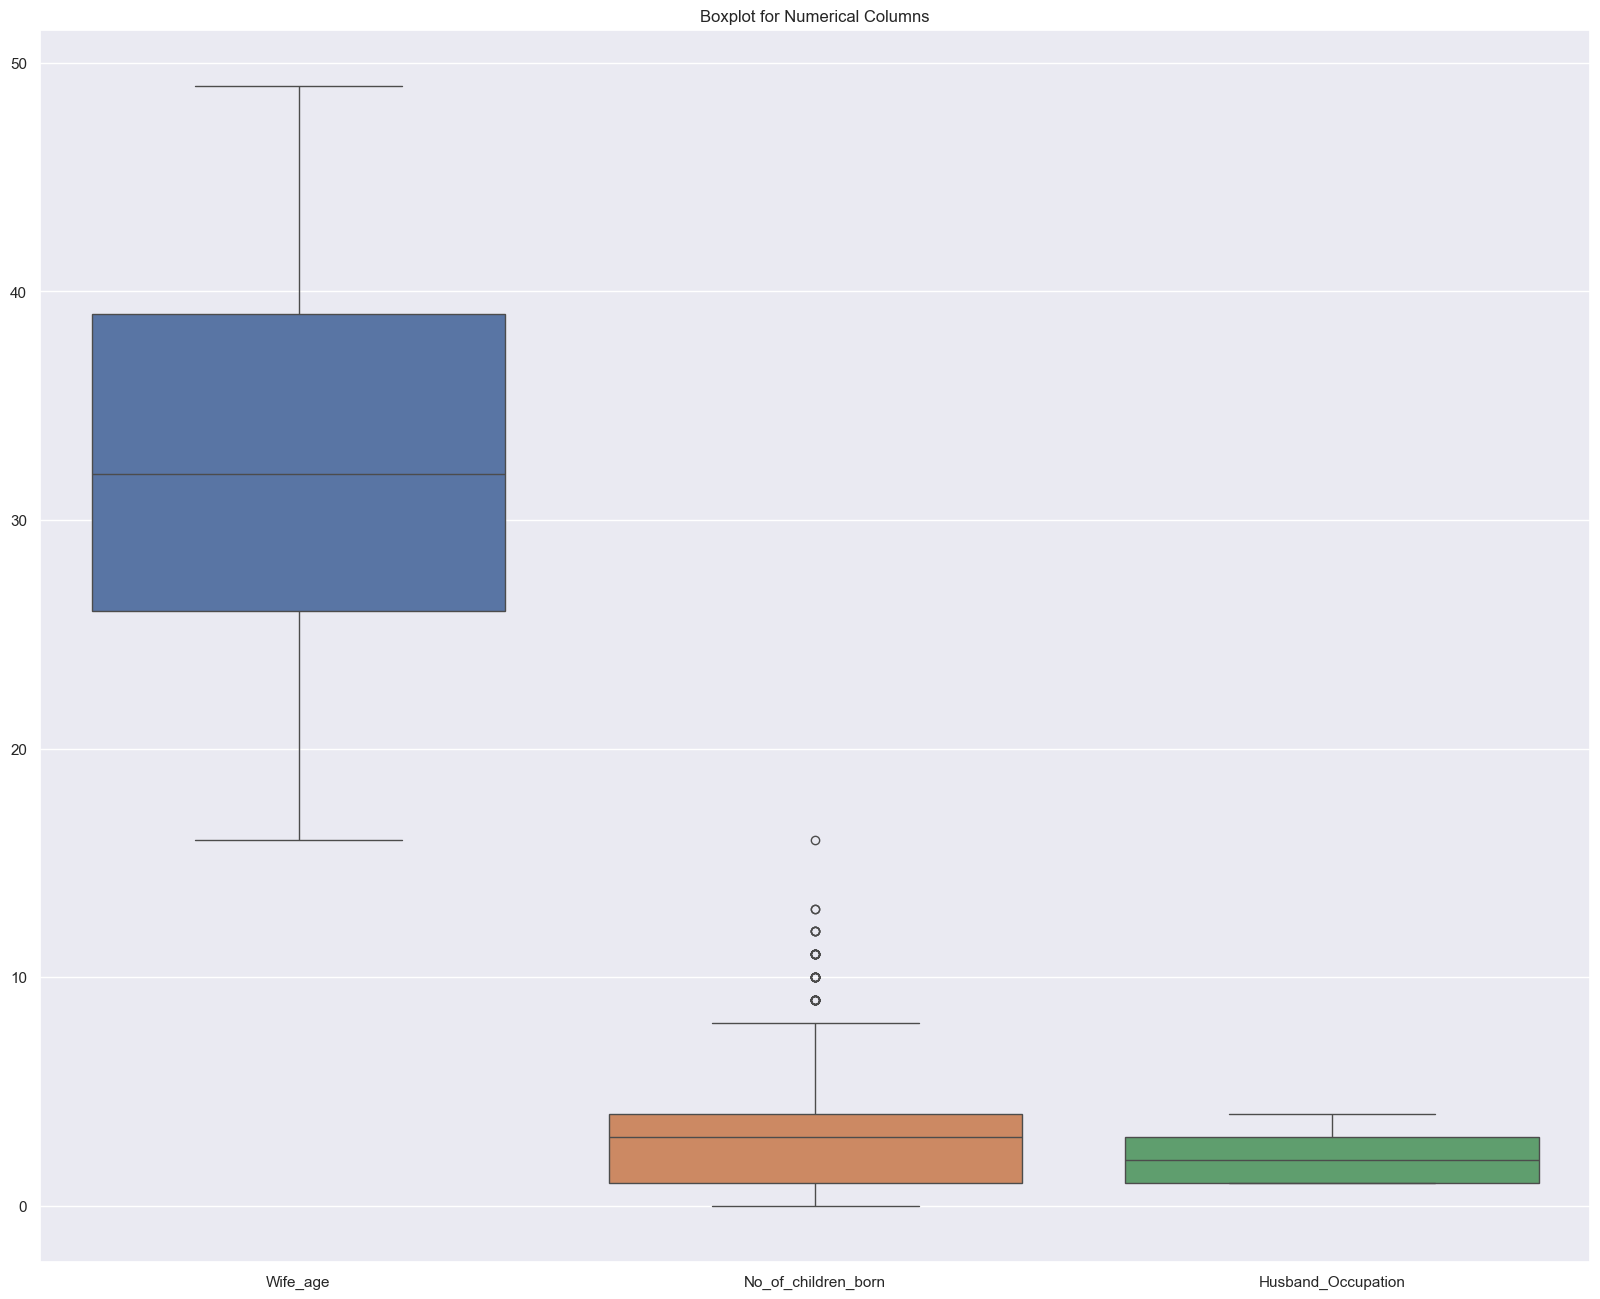

In [160]:
# Set up subplot for boxplot
fig, axes = plt.subplots(figsize=(20,16))

# Draw boxplot for all numerical columns
sns.boxplot(data=df2[num_columns2], ax=axes)
axes.set_title('Boxplot for Numerical Columns')

# Show the boxplot
plt.show()

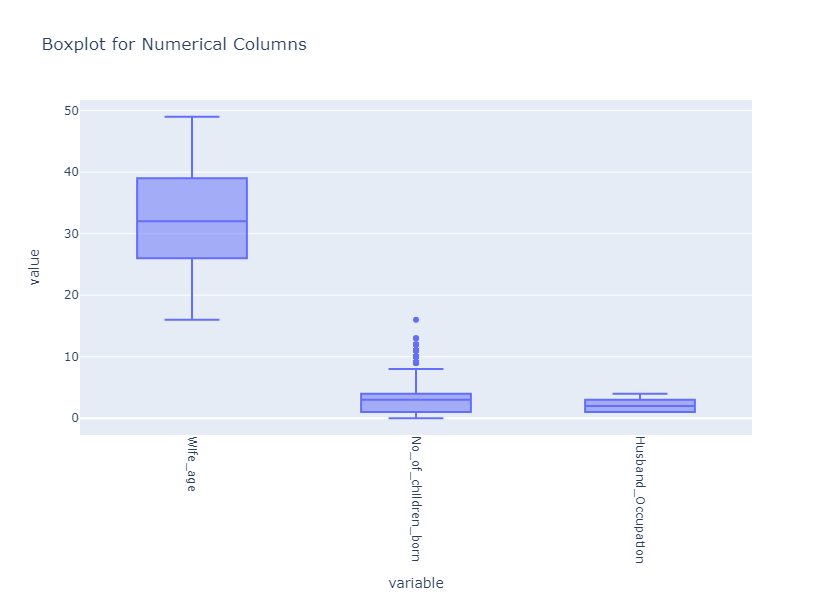

In [161]:
# Create a boxplot using Plotly Express
fig = px.box(df2, y=num_columns2, title='Boxplot for Numerical Columns')
fig.update_layout(height=600, width=800)
fig.update_xaxes(tickangle=90)
# Show the plot
fig.show()

# Bivariate Analysis

# Numeric Vs Numeric

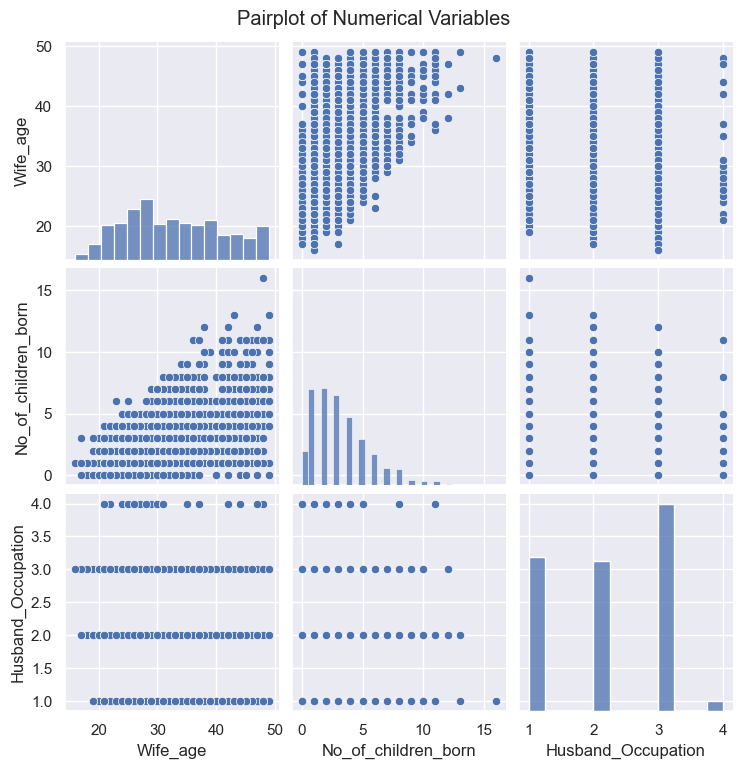

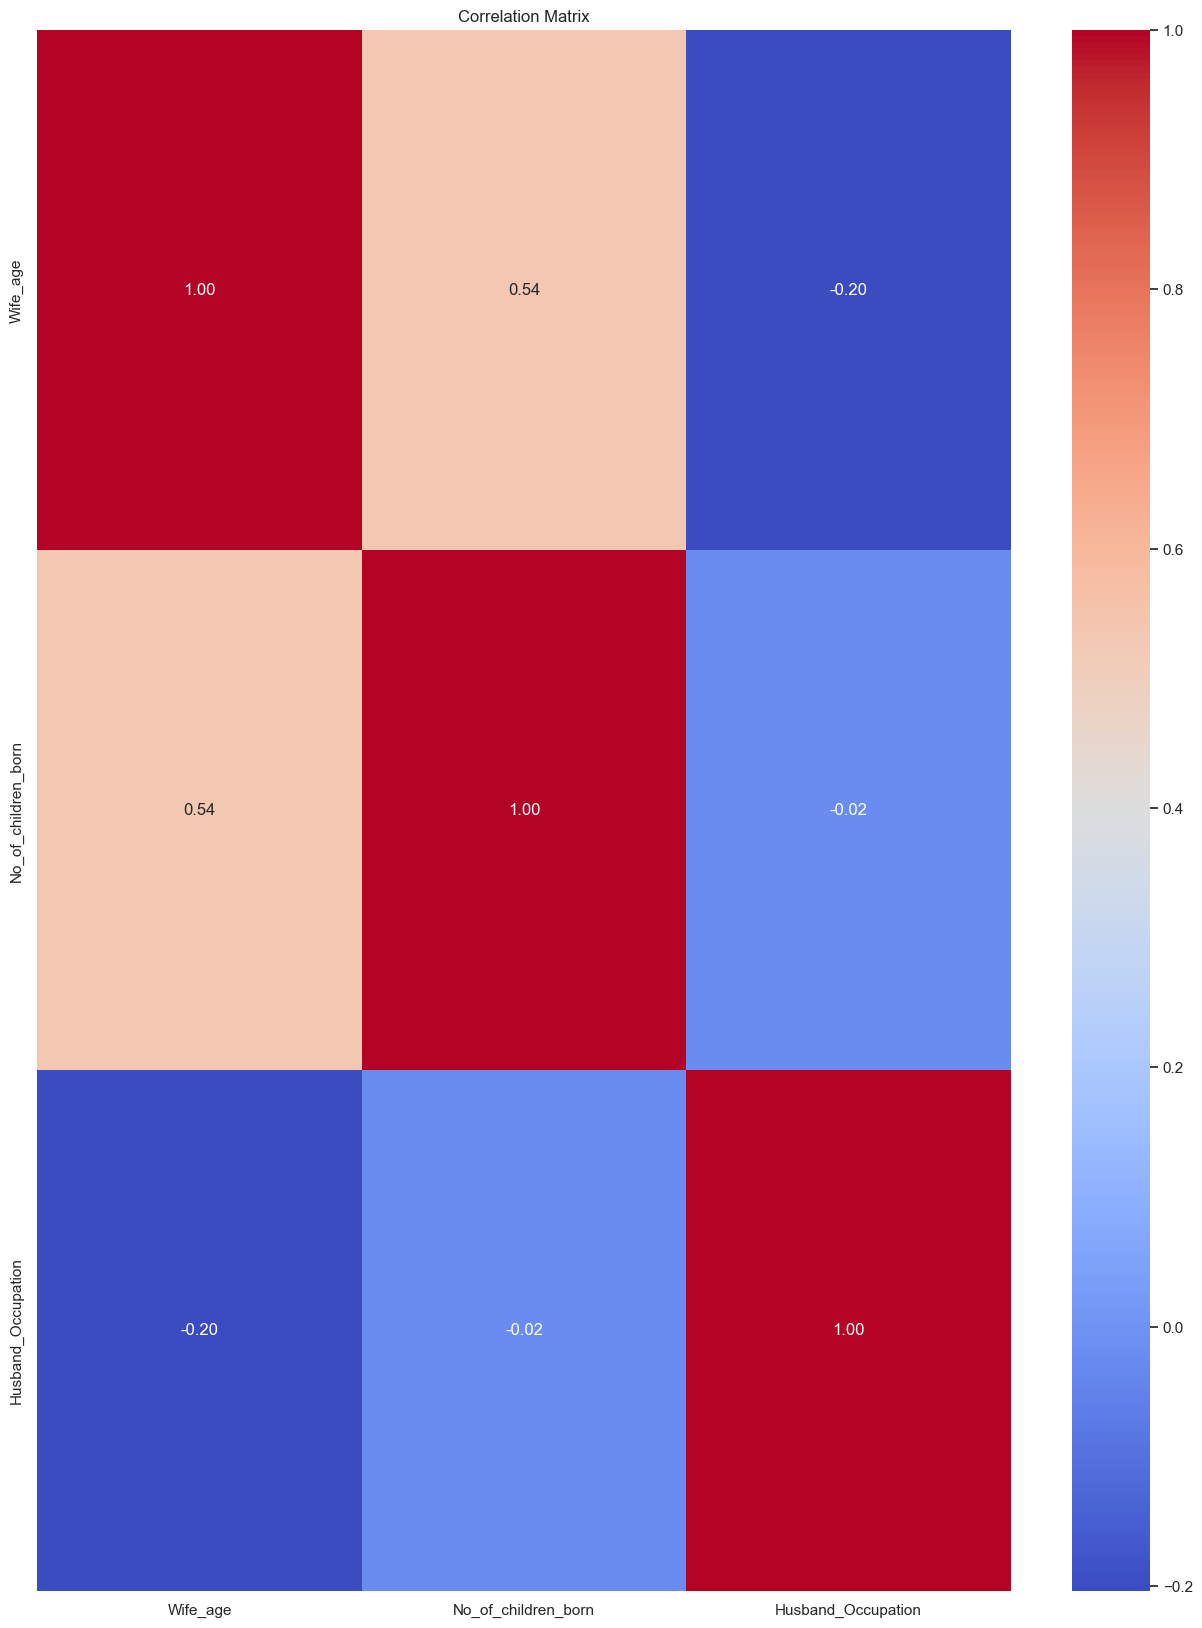

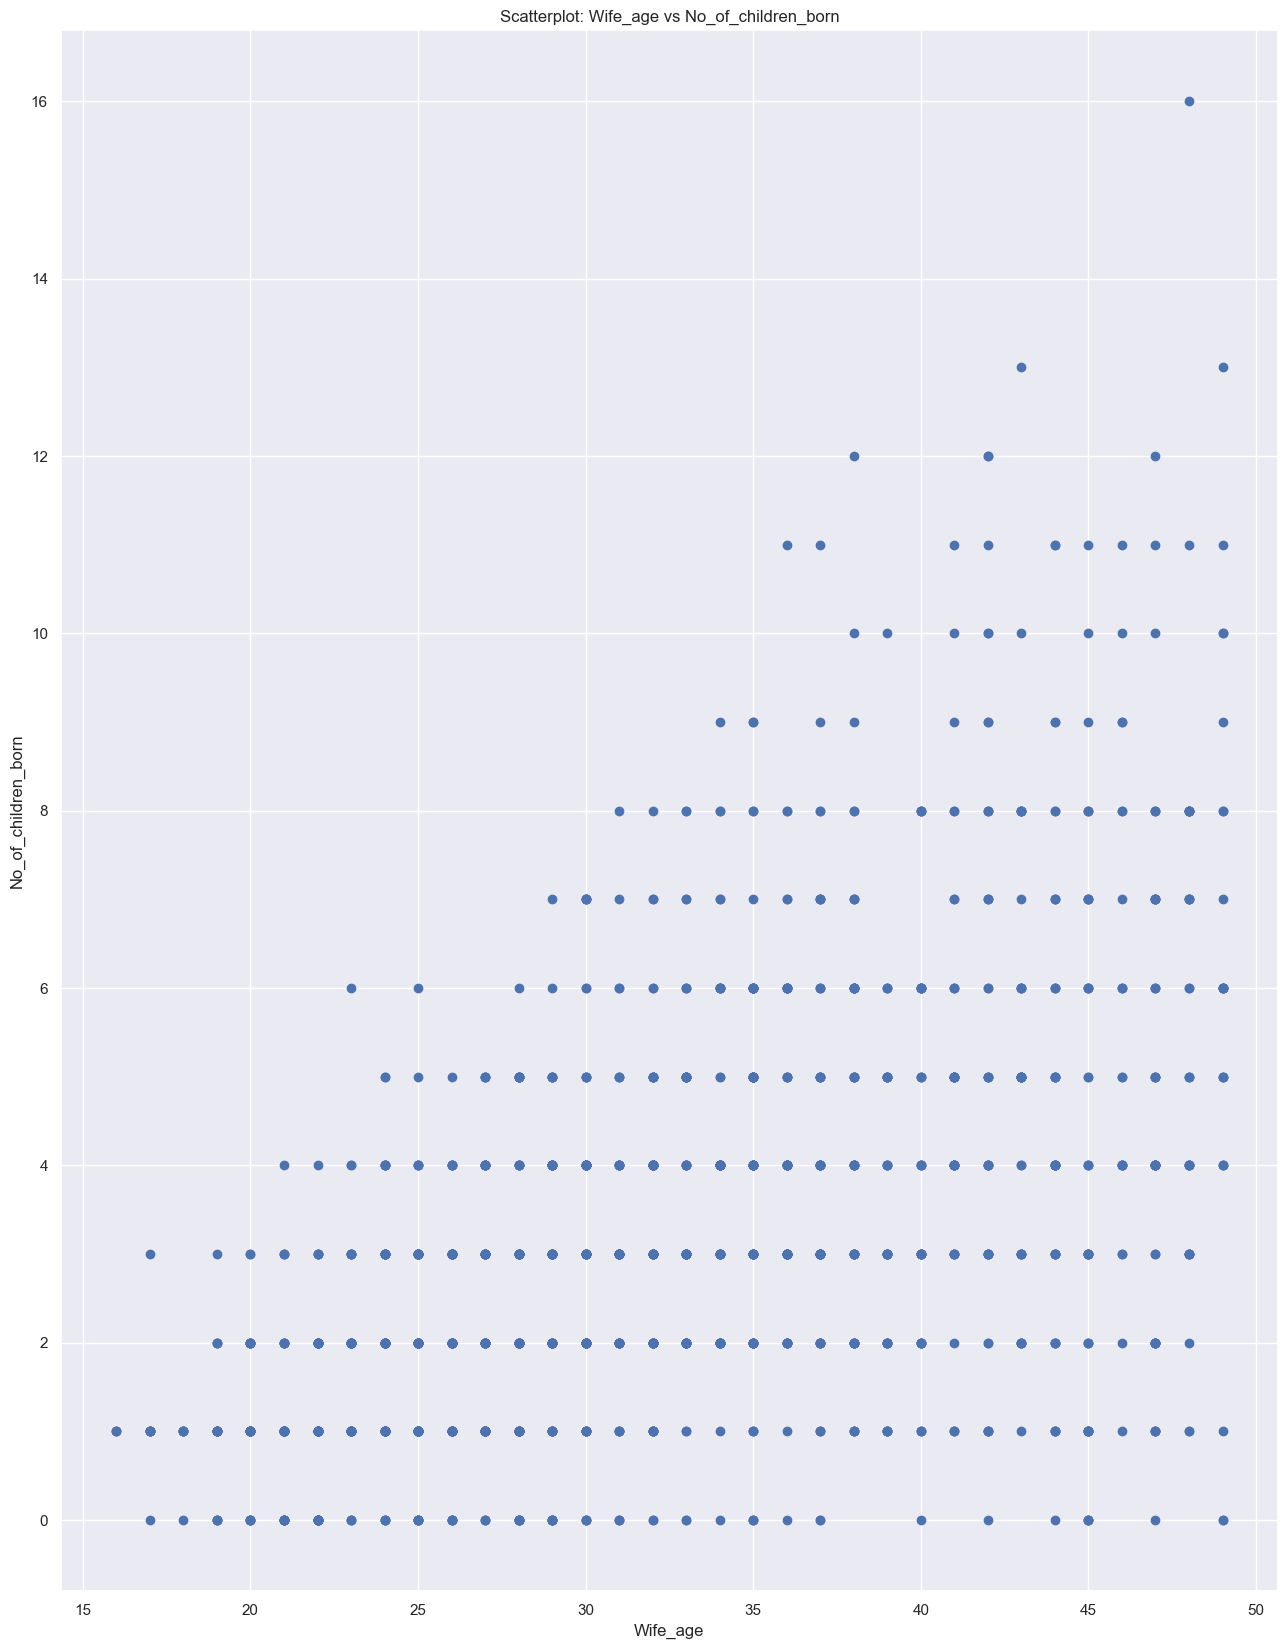

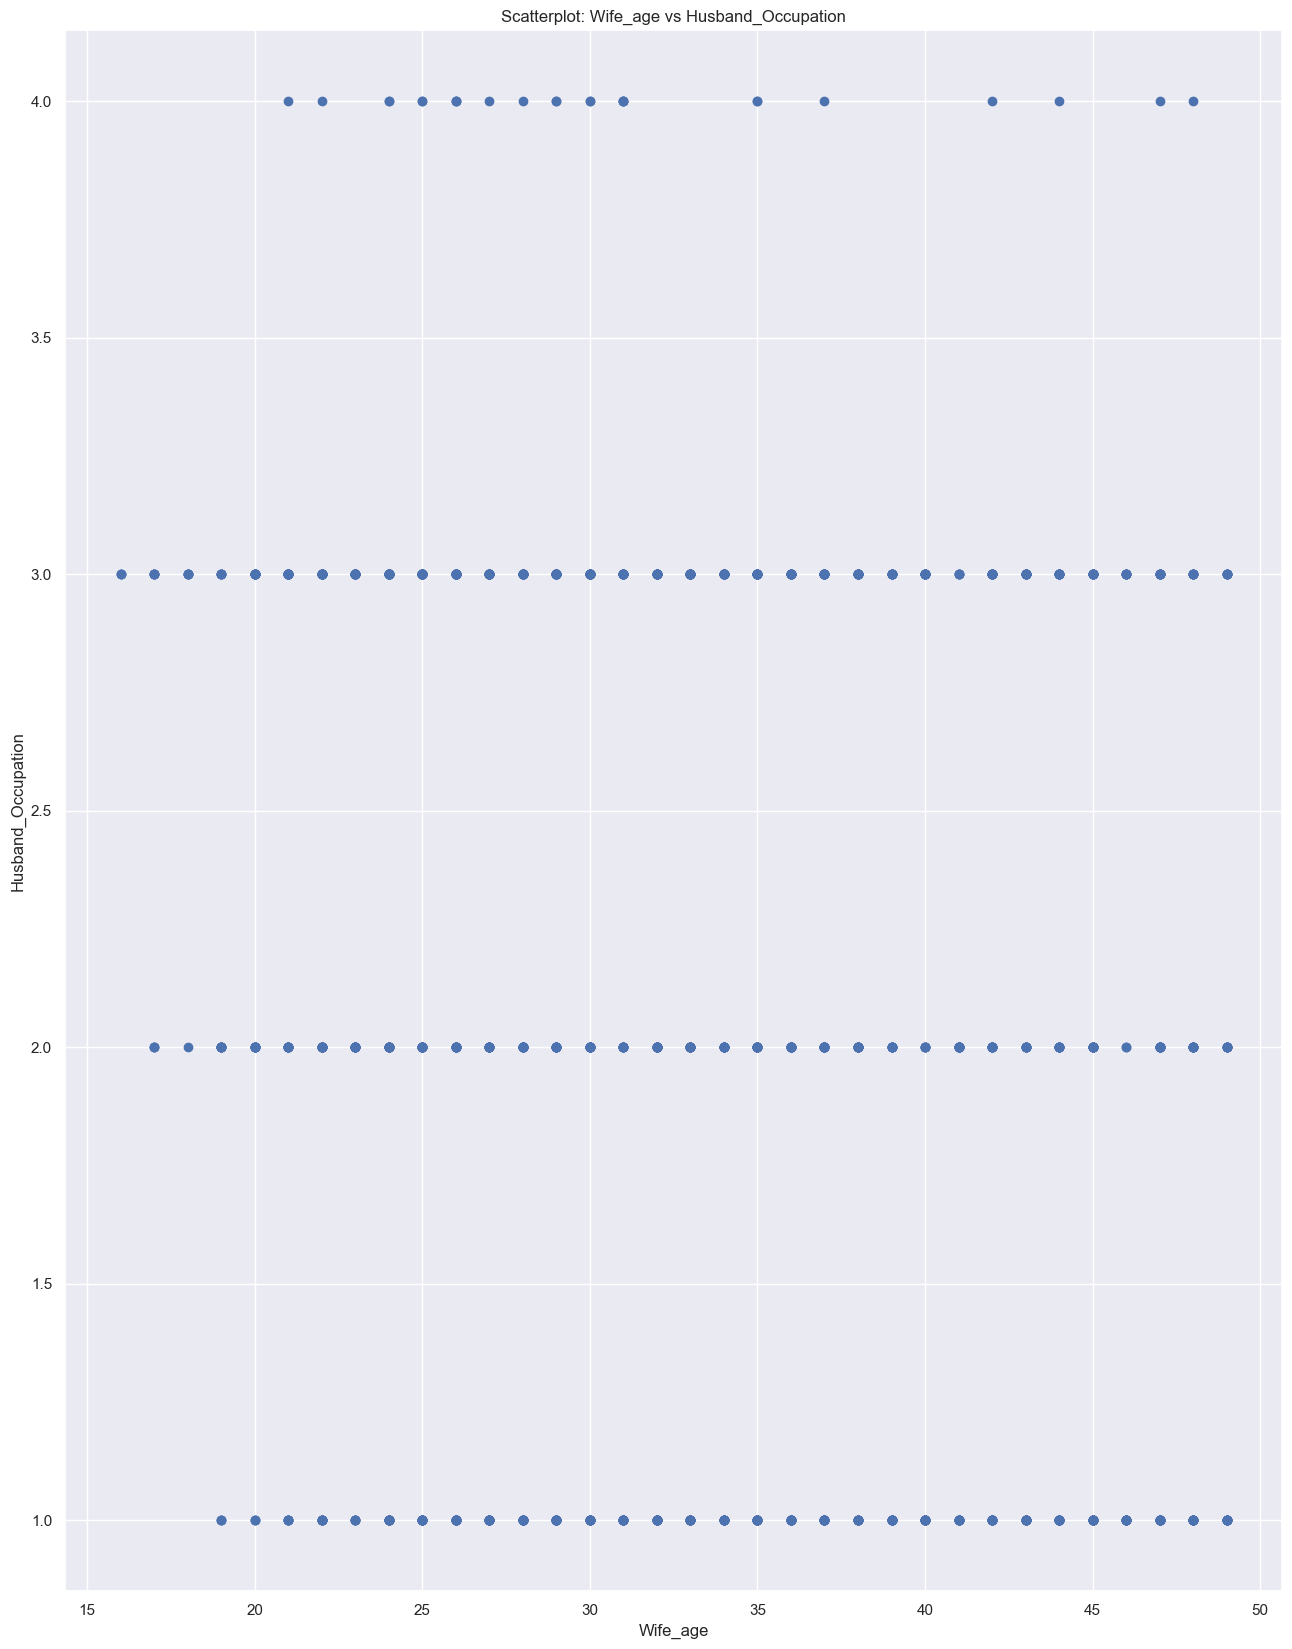

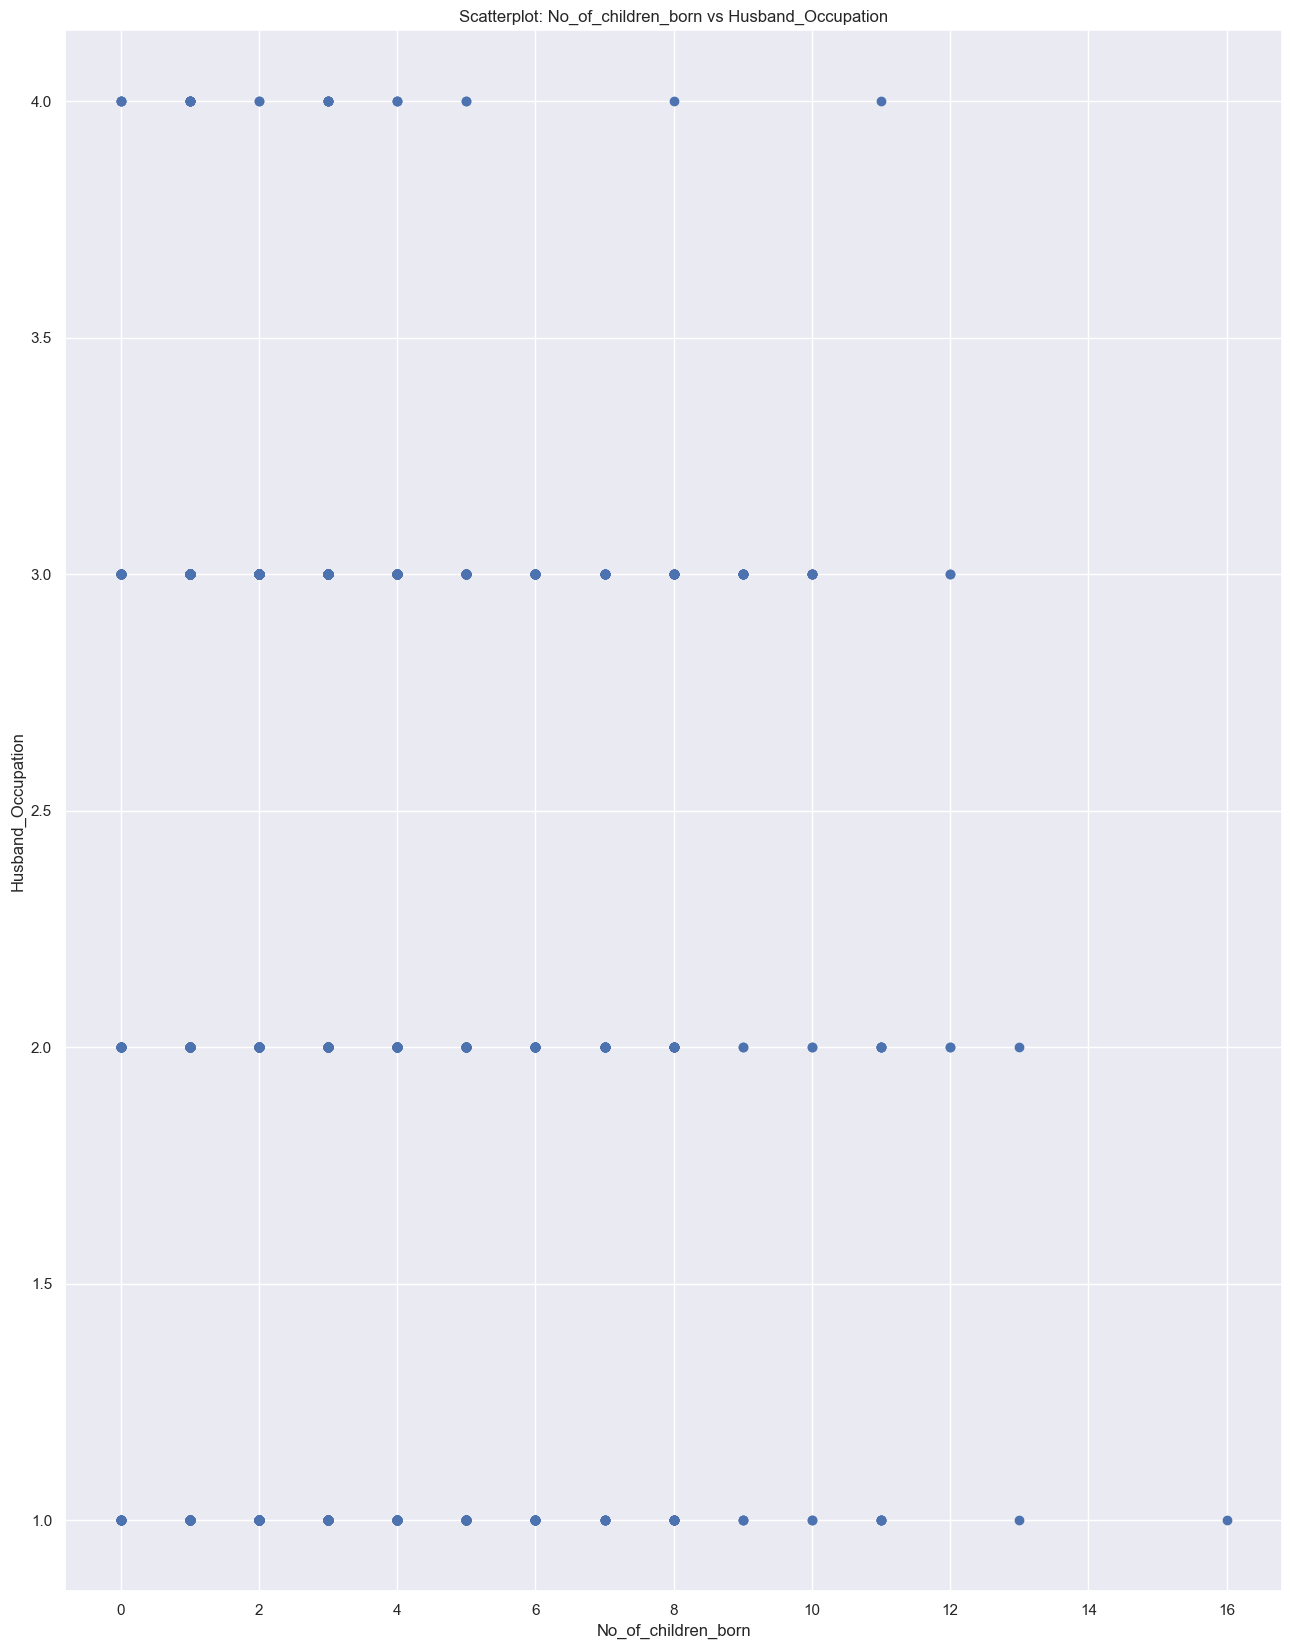

In [162]:
# Pairplot
sns.pairplot(df2[num_columns2])
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
sns.set(rc={'figure.figsize':(15.7,20.27)})
#plt.savefig("pair_NvN.png", format="png", bbox_inches='tight')
plt.show()

# Correlation Matrix
correlation_matrix = df2[num_columns2].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
sns.set(rc={'figure.figsize':(15.7,20.27)})
#plt.savefig("corr_NvN.png", format="png", bbox_inches='tight')
plt.show()

# Scatterplots
for i in range(len(num_columns2)):
    for j in range(i+1, len(num_columns2)):
        plt.scatter(df2[num_columns2[i]], df2[num_columns2[j]])
        plt.xlabel(num_columns2[i])
        plt.ylabel(num_columns2[j])
        plt.title(f'Scatterplot: {num_columns2[i]} vs {num_columns2[j]}')
        #plt.savefig(f"scatter_NvN_{num_columns[i]}_vs_{num_columns[j]}.png", format="png", bbox_inches='tight')
        plt.show()


# Jointplots
#for i in range(len(num_columns)):
#    for j in range(i+1, len(num_columns)):
#        sns.jointplot(x=num_columns[i], y=num_columns[j], data=df, kind='scatter')
#        fig.suptitle(f'Jointplot: {num_columns[i]} vs {num_columns[j]}', y=1.02)
        #plt.savefig(f"joint_NvN_{num_columns[i]}_vs_{num_columns[j]}.png", format="png", bbox_inches='tight')
#        plt.show()
        


In [163]:
# Convert correlation matrix to a long-form DataFrame for sorting
correlation_df2 = correlation_matrix.unstack().reset_index(name='Correlation')
sorted_correlation_df2 = correlation_df2.sort_values(by='Correlation', ascending=False)

# Print the sorted correlation values
print("Sorted Correlation Matrix (Descending Order):")
for idx, row in sorted_correlation_df2.iterrows():
    print(f"{row['level_0']} vs {row['level_1']}: {row['Correlation']:.2f}")


Sorted Correlation Matrix (Descending Order):
Wife_age vs Wife_age: 1.00
No_of_children_born vs No_of_children_born: 1.00
Husband_Occupation vs Husband_Occupation: 1.00
Wife_age vs No_of_children_born: 0.54
No_of_children_born vs Wife_age: 0.54
No_of_children_born vs Husband_Occupation: -0.02
Husband_Occupation vs No_of_children_born: -0.02
Wife_age vs Husband_Occupation: -0.20
Husband_Occupation vs Wife_age: -0.20


# Categorical to Numerical

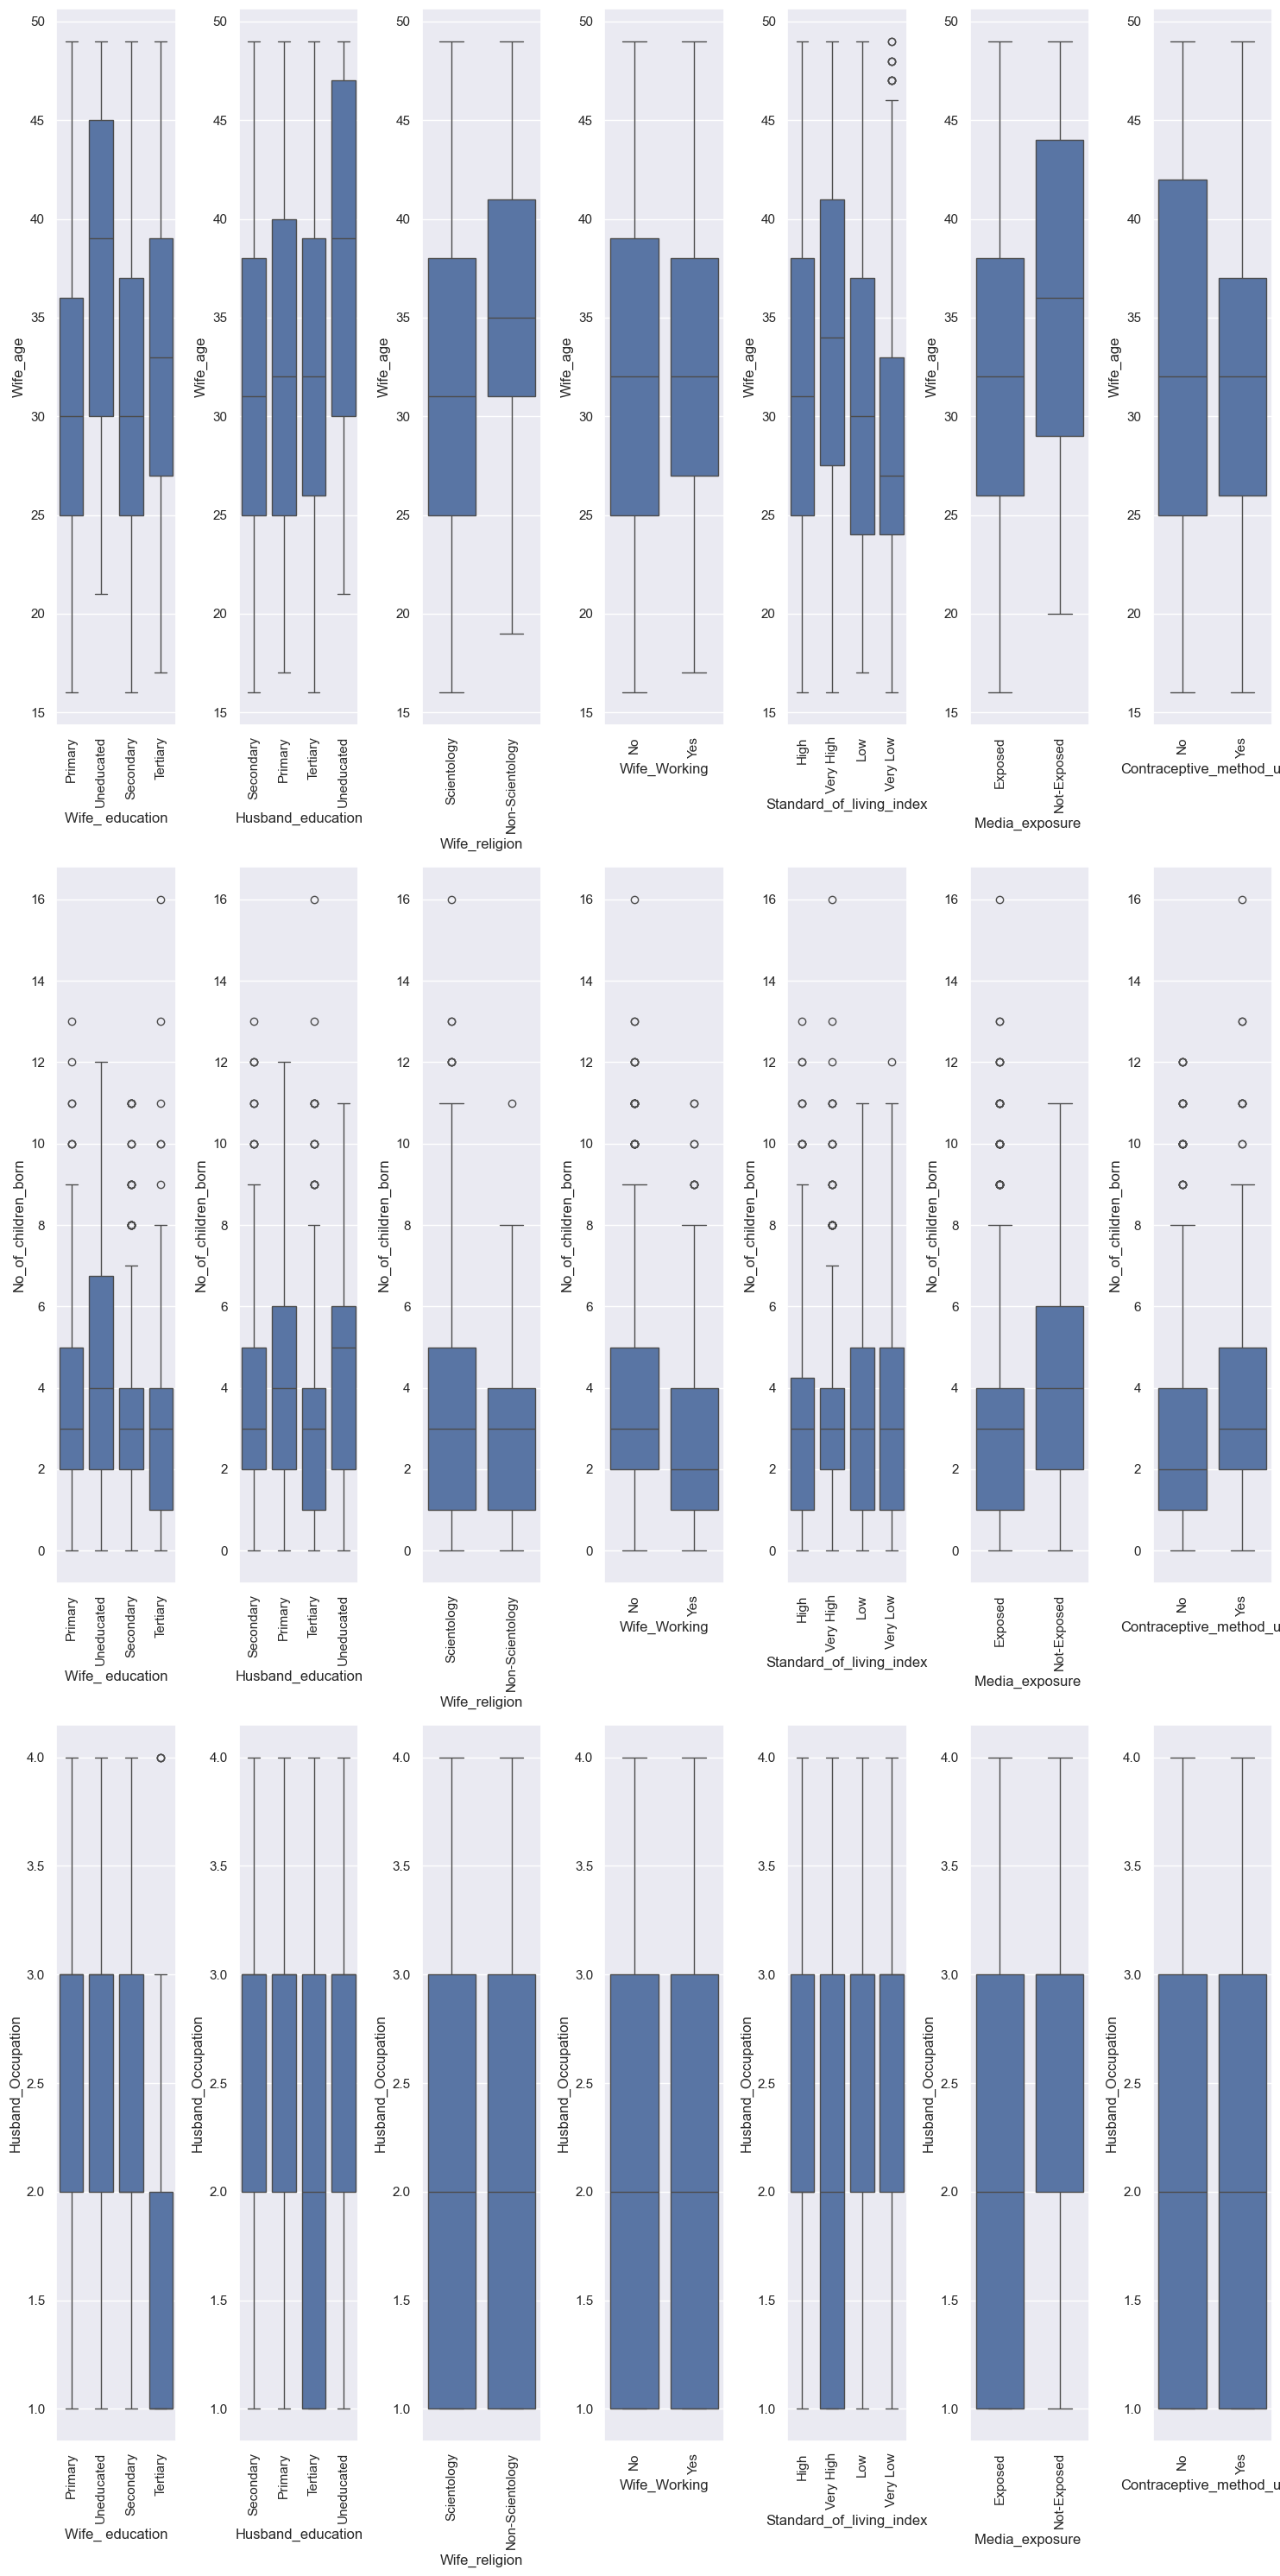

In [164]:
# Set up subplots
fig, axes = plt.subplots(nrows=len(num_columns2), ncols=len(cat_columns2), figsize=(15, 30))

# Flatten the axes array
axes = axes.flatten()

# Iterate through numerical and categorical columns for boxplots
for i, num_col in enumerate(num_columns2):
    for j, cat_col in enumerate(cat_columns2):
        # Create boxplot for the current combination
        sns.boxplot(x=cat_col, y=num_col, data=df2, ax=axes[i * len(cat_columns2) + j])
        axes[i * len(cat_columns2) + j].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()


In [165]:
# Iterate through numerical and categorical columns for statistical values
for num_col in num_columns2:
    for cat_col in cat_columns2:
        # Extract statistical values for the current combination
        stats = df2.groupby(cat_col)[num_col].describe()
        
        # Print the statistics
        print(f"\nStatistics for {num_col} vs {cat_col}:\n{stats}")


Statistics for Wife_age vs Wife_ education:
                 count       mean       std   min   25%   50%   75%   max
Wife_ education                                                          
Primary          317.0  30.936909  7.983119  16.0  25.0  30.0  36.0  49.0
Secondary        394.0  31.111675  8.065111  16.0  25.0  30.0  37.0  49.0
Tertiary         545.0  33.363303  7.881483  17.0  27.0  33.0  39.0  49.0
Uneducated       146.0  37.438356  8.691631  21.0  30.0  39.0  45.0  49.0

Statistics for Wife_age vs Husband_education:
                   count       mean       std   min   25%   50%   75%   max
Husband_education                                                          
Primary            170.0  32.800000  8.759509  17.0  25.0  32.0  40.0  49.0
Secondary          333.0  31.897898  8.262364  16.0  25.0  31.0  38.0  49.0
Tertiary           856.0  32.589953  8.035963  16.0  26.0  32.0  39.0  49.0
Uneducated          43.0  37.651163  9.536605  21.0  30.0  39.0  47.0  49.0

Statist

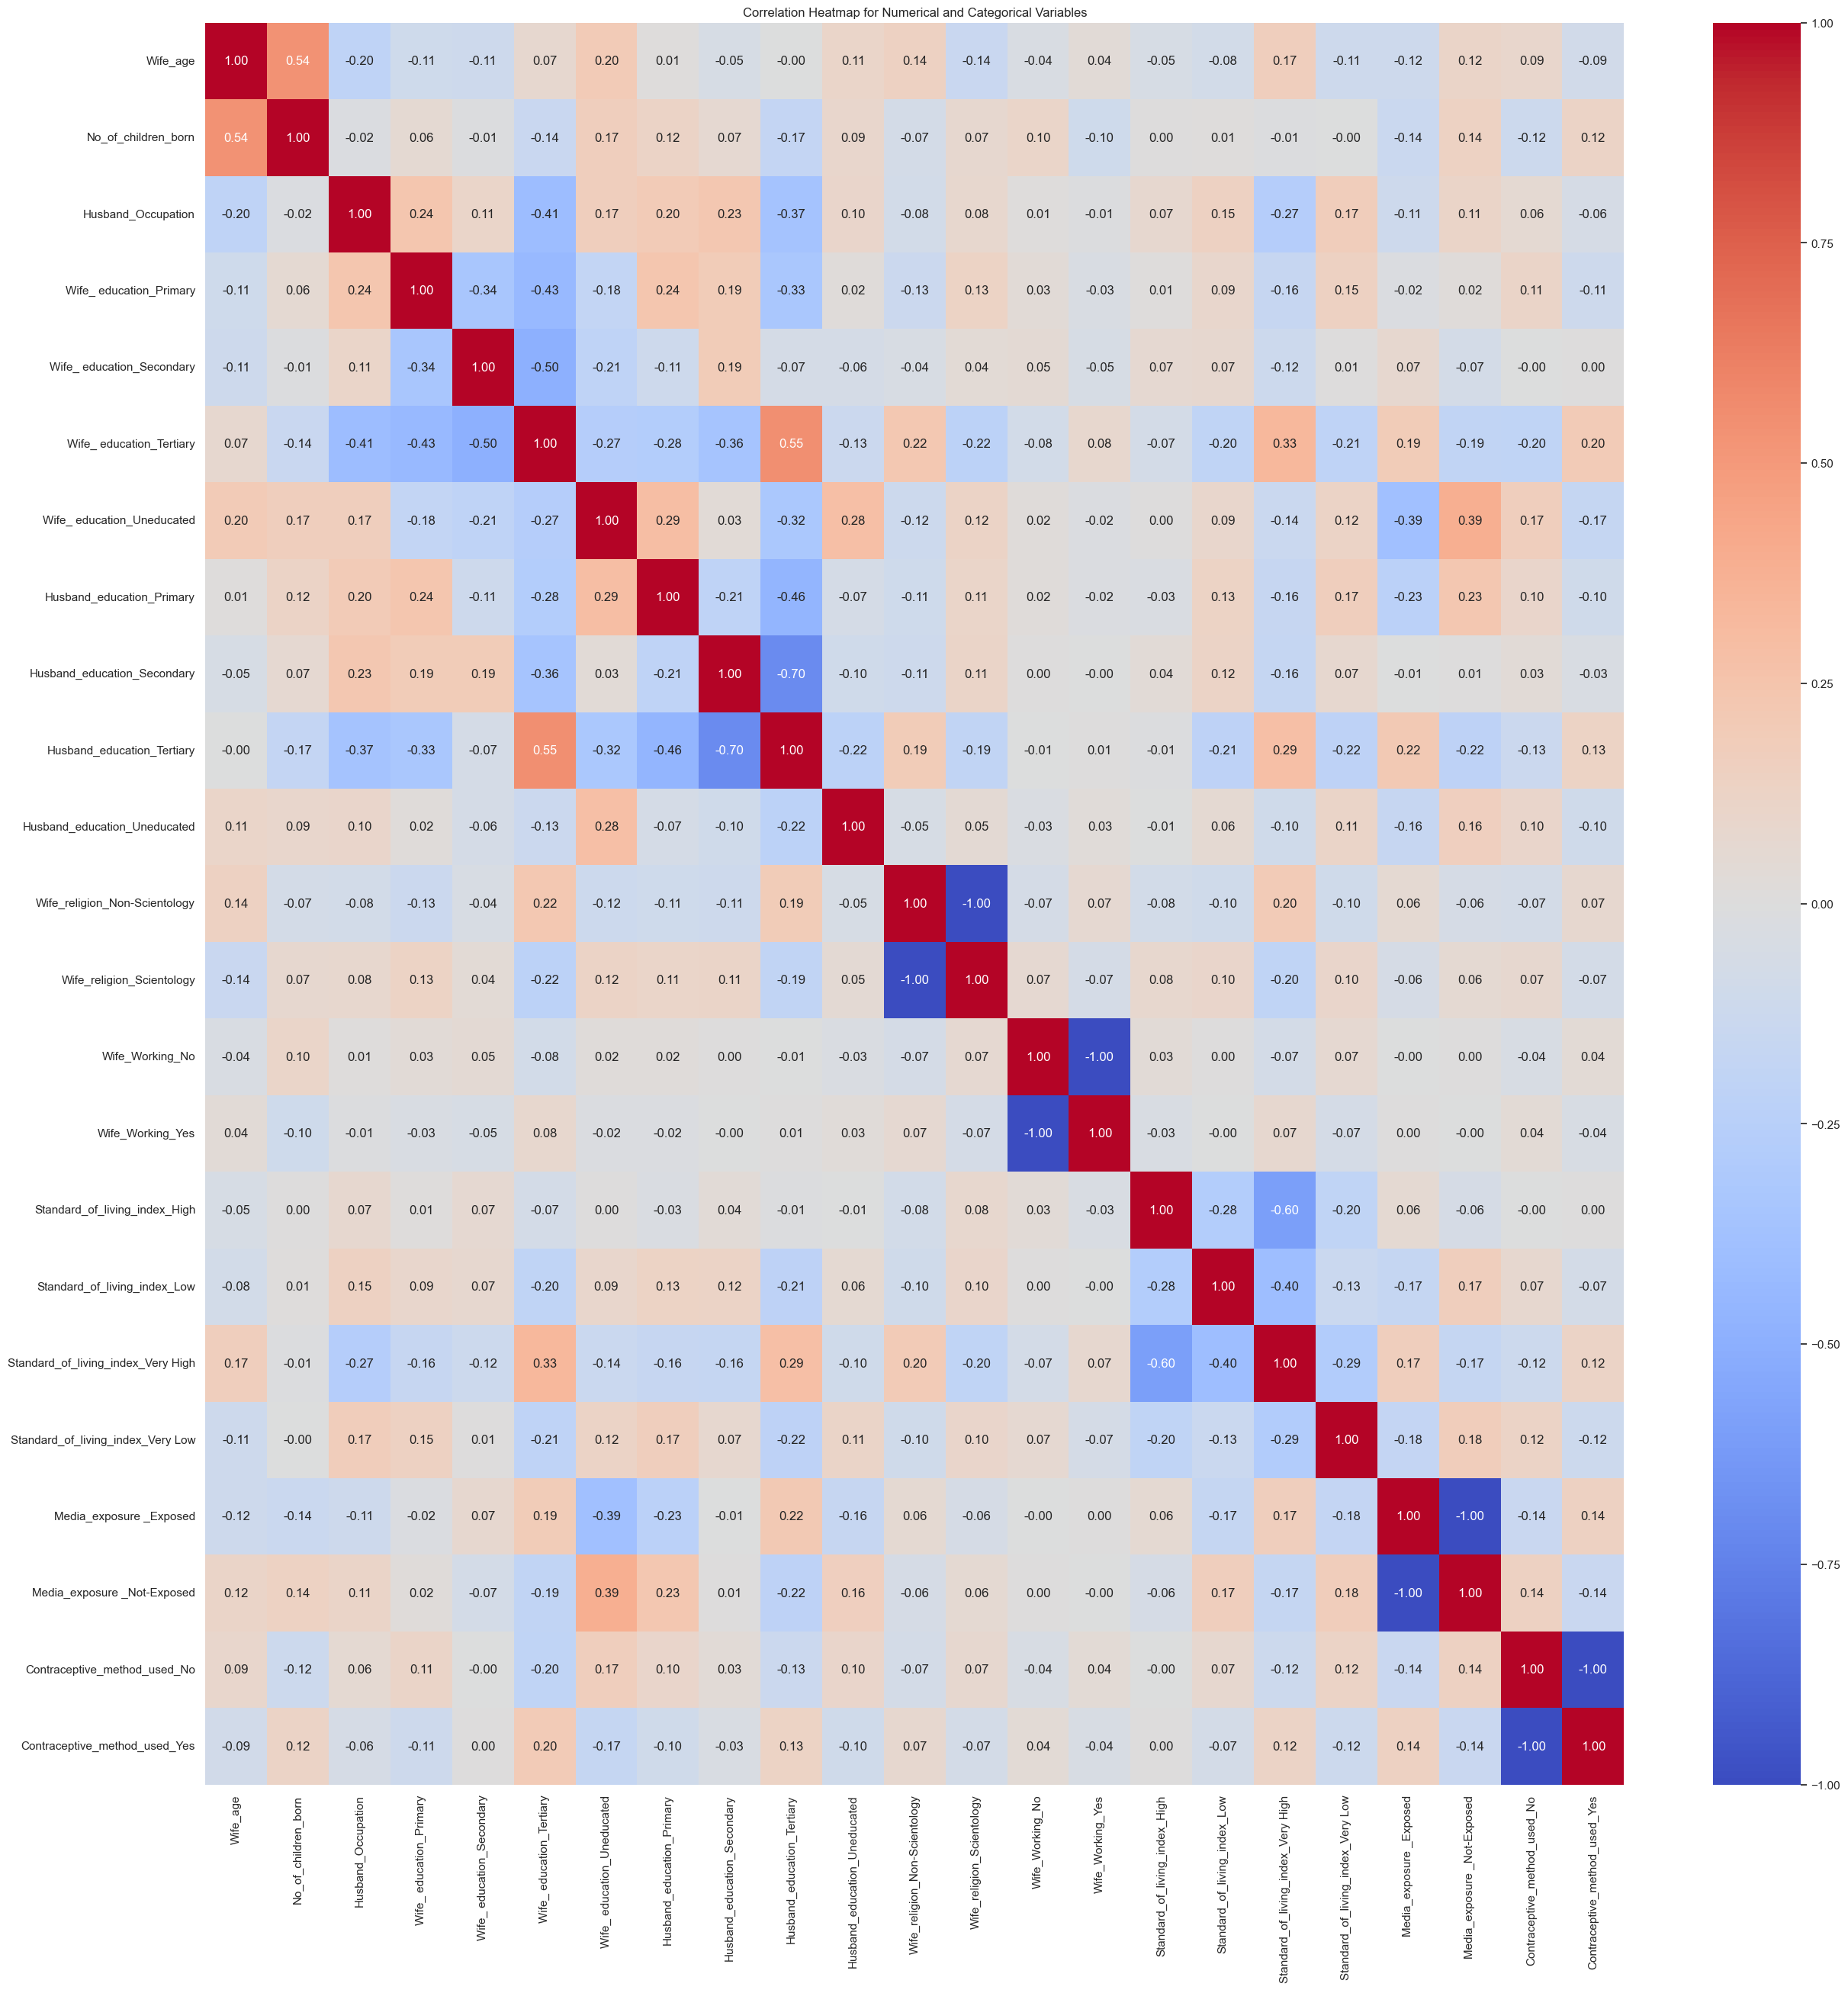

In [166]:
# Convert categorical columns to numerical using one-hot encoding
df_encoded2 = pd.get_dummies(df2, columns=cat_columns2)

# Exclude numerical columns from encoded categorical columns
cat_columns_encoded2 = [col for col in df_encoded2.columns if col not in num_columns2]
num_columns2 = [col for col in df_encoded2.columns if col not in cat_columns_encoded2]

# Combine numerical and encoded categorical columns
all_columns2 = num_columns2 + cat_columns_encoded2

# Compute the correlation matrix
corr_matrix2 = df_encoded2[all_columns2].corr()

# Set up the matplotlib figure
plt.figure(figsize=(30, 30))

# Create a heatmap for the correlation matrix
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Correlation Heatmap for Numerical and Categorical Variables')

# Show the plot
plt.show()

In [167]:
# Flatten the upper triangle of the correlation matrix
corr_values2 = corr_matrix2.where(np.triu(np.ones(corr_matrix2.shape), k=1).astype(bool)).stack().sort_values(ascending=False)

# Display correlations in descending order
print("Correlations in Descending Order:")

for pair, correlation in corr_values2.items():
    col1, col2 = pair
    print(f"{col1} and {col2}: {correlation:.2f}")

Correlations in Descending Order:
Wife_ education_Tertiary and Husband_education_Tertiary: 0.55
Wife_age and No_of_children_born: 0.54
Wife_ education_Uneducated and Media_exposure _Not-Exposed: 0.39
Wife_ education_Tertiary and Standard_of_living_index_Very High: 0.33
Wife_ education_Uneducated and Husband_education_Primary: 0.29
Husband_education_Tertiary and Standard_of_living_index_Very High: 0.29
Wife_ education_Uneducated and Husband_education_Uneducated: 0.28
Husband_Occupation and Wife_ education_Primary: 0.24
Wife_ education_Primary and Husband_education_Primary: 0.24
Husband_education_Primary and Media_exposure _Not-Exposed: 0.23
Husband_Occupation and Husband_education_Secondary: 0.23
Wife_ education_Tertiary and Wife_religion_Non-Scientology: 0.22
Husband_education_Tertiary and Media_exposure _Exposed: 0.22
Wife_religion_Non-Scientology and Standard_of_living_index_Very High: 0.20
Wife_ education_Tertiary and Contraceptive_method_used_Yes: 0.20
Wife_age and Wife_ education_

# Problem 2 - Data Pre-processing

In [168]:
df2.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [169]:
df2.duplicated().sum()

80

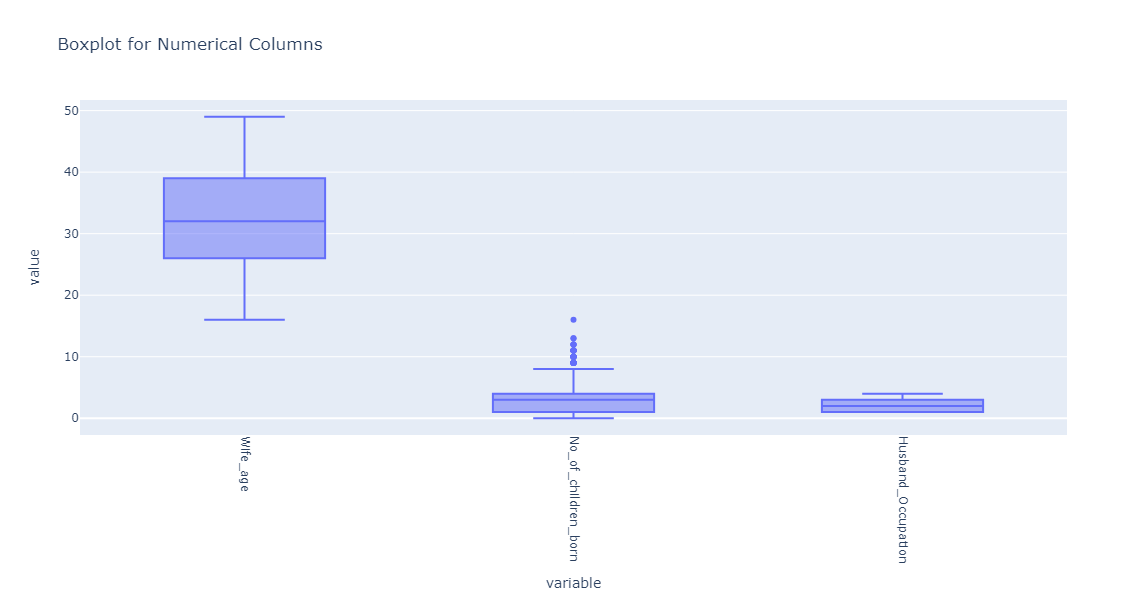

In [170]:
# Create a boxplot using Plotly Express
fig = px.box(df2, y=num_columns2, title='Boxplot for Numerical Columns')
fig.update_layout(height=600, width=800)
fig.update_xaxes(tickangle=90)
# Show the plot
fig.show()

In [171]:
df2.drop_duplicates(inplace=True)

In [172]:
df2.duplicated().sum()

0

In [173]:
df2['Wife_age'] = df2['Wife_age'].fillna(df2['Wife_age'].median())
df2['No_of_children_born'] = df2['No_of_children_born'].fillna(df2['No_of_children_born'].median())

In [174]:
df2.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

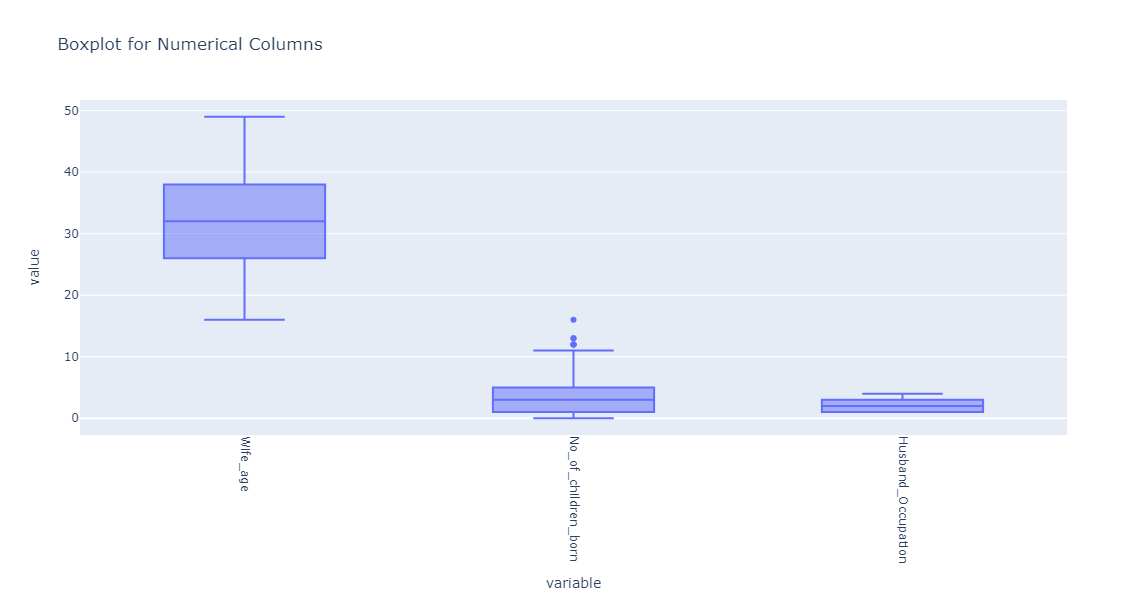

In [175]:
# Create a boxplot using Plotly Express
fig = px.box(df2, y=num_columns2, title='Boxplot for Numerical Columns')
fig.update_layout(height=600, width=800)
fig.update_xaxes(tickangle=90)
# Show the plot
fig.show()

In [176]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [177]:
lr,ur=remove_outlier(df2['No_of_children_born'])
print('Lower Range :',lr,'\nUpper Range :',ur)

Lower Range : -5.0 
Upper Range : 11.0


In [178]:
df2['No_of_children_born'] = np.where(df2['No_of_children_born'] > ur, ur, df2['No_of_children_born'])
df2['No_of_children_born'] = np.where(df2['No_of_children_born'] < lr, lr, df2['No_of_children_born'])

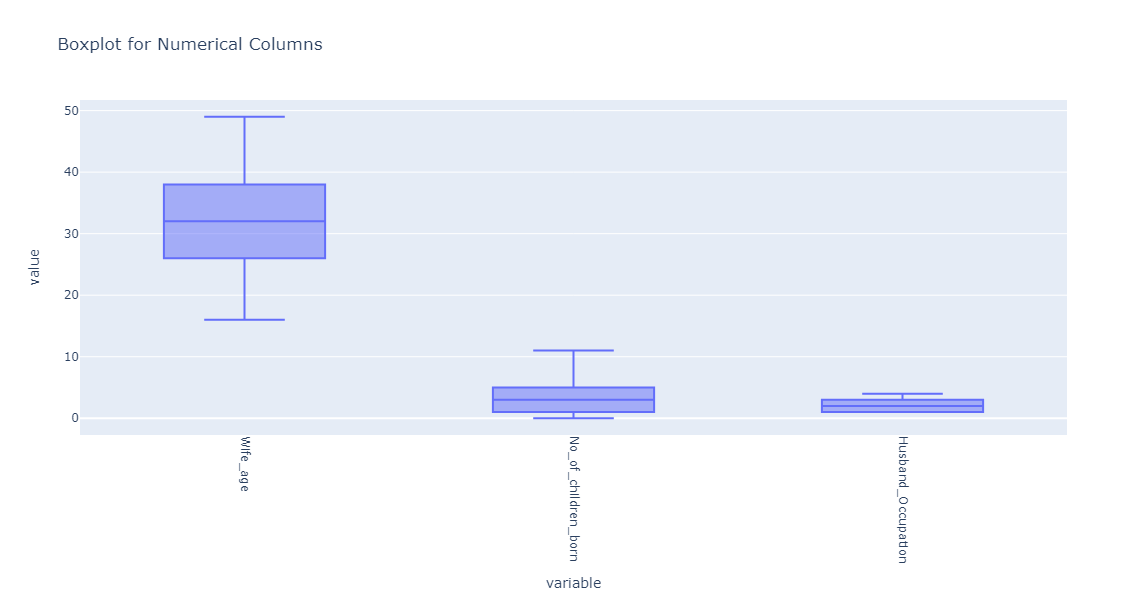

In [179]:
# Create a boxplot using Plotly Express
fig = px.box(df2, y=num_columns2, title='Boxplot for Numerical Columns')
fig.update_layout(height=600, width=800)
fig.update_xaxes(tickangle=90)
# Show the plot
fig.show()

In [180]:
df2['No_of_children_born'].value_counts()

No_of_children_born
2.0     258
1.0     257
3.0     253
4.0     180
5.0     126
0.0      92
6.0      88
7.0      49
8.0      45
11.0     18
9.0      16
10.0     11
Name: count, dtype: int64

In [181]:
# Loop through the selected columns
for column in num_columns2:
    count_info = df2[column].value_counts()
    print(f'Count information for {column}:\n{count_info}\n{"="*30}\n')


Count information for Wife_age:
Wife_age
32.0    124
25.0     74
26.0     60
30.0     57
28.0     57
24.0     56
35.0     54
22.0     54
27.0     54
29.0     53
33.0     51
36.0     45
34.0     44
37.0     44
23.0     42
38.0     42
31.0     40
21.0     40
47.0     39
45.0     36
44.0     36
42.0     35
39.0     33
40.0     33
43.0     32
48.0     30
41.0     28
20.0     25
49.0     22
46.0     19
19.0     17
17.0      8
18.0      6
16.0      3
Name: count, dtype: int64

Count information for No_of_children_born:
No_of_children_born
2.0     258
1.0     257
3.0     253
4.0     180
5.0     126
0.0      92
6.0      88
7.0      49
8.0      45
11.0     18
9.0      16
10.0     11
Name: count, dtype: int64

Count information for Husband_Occupation:
Husband_Occupation
3    570
2    415
1    381
4     27
Name: count, dtype: int64



In [182]:
# from sklearn.preprocessing import LabelEncoder
# df2 = df2.apply(LabelEncoder().fit_transform)
# df2

In [183]:
df2

Wife_age Wife_ education Husband_education  No_of_children_born  \
0         24.0         Primary         Secondary                  3.0   
1         45.0      Uneducated         Secondary                 10.0   
2         43.0         Primary         Secondary                  7.0   
3         42.0       Secondary           Primary                  9.0   
4         36.0       Secondary         Secondary                  8.0   
...        ...             ...               ...                  ...   
1468      33.0        Tertiary          Tertiary                  3.0   
1469      33.0        Tertiary          Tertiary                  3.0   
1470      39.0       Secondary         Secondary                  3.0   
1471      33.0       Secondary         Secondary                  3.0   
1472      17.0       Secondary         Secondary                  1.0   

     Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0      Scientology           No                   2                     High   
1      Scientology           No                   3                Very High   
2      Scientology           No                   3                Very High   
3      Scientology           No                   3                     High   
4      Scientology           No                   3                      Low   
...            ...          ...                 ...                      ...   
1468   Scientology          Yes                   2                Very High   
1469   Scientology           No                   1                Very High   
1470   Scientology          Yes                   1                Very High   
1471   Scientology          Yes                   2                      Low   
1472   Scientology           No                   2                Very High   

     Media_exposure  Contraceptive_method_used  
0            Exposed                        No  
1            Exposed                        No  
2            Exposed                        No  
3            Exposed                        No  
4            Exposed                        No  
...              ...                       ...  
1468         Exposed                       Yes  
1469         Exposed                       Yes  
1470         Exposed                       Yes  
1471         Exposed                       Yes  
1472         Exposed                       Yes  

[1393 rows x 10 columns]

In [184]:
df2['Wife_ education']=np.where(df2['Wife_ education'] =='Uneducated', '1', df2['Wife_ education'])
df2['Wife_ education']=np.where(df2['Wife_ education'] =='Primary', '2', df2['Wife_ education'])
df2['Wife_ education']=np.where(df2['Wife_ education'] =='Secondary', '3', df2['Wife_ education'])
df2['Wife_ education']=np.where(df2['Wife_ education'] =='Tertiary', '4', df2['Wife_ education'])

df2['Husband_education']=np.where(df2['Husband_education'] =='Uneducated', '1', df2['Husband_education'])
df2['Husband_education']=np.where(df2['Husband_education'] =='Primary', '2', df2['Husband_education'])
df2['Husband_education']=np.where(df2['Husband_education'] =='Secondary', '3', df2['Husband_education'])
df2['Husband_education']=np.where(df2['Husband_education'] =='Tertiary', '4', df2['Husband_education'])

df2['Wife_religion']=np.where(df2['Wife_religion'] =='Non-Scientology', 0, df2['Wife_religion'])
df2['Wife_religion']=np.where(df2['Wife_religion'] =='Scientology', 1, df2['Wife_religion'])

df2['Wife_Working'] = np.where(df2['Wife_Working'] == 'No', 0, df2['Wife_Working'])
df2['Wife_Working'] = np.where(df2['Wife_Working'] == 'Yes', 1, df2['Wife_Working'])

df2['Standard_of_living_index'] = np.where(df2['Standard_of_living_index'] == 'Very Low', '1', df2['Standard_of_living_index'])
df2['Standard_of_living_index'] = np.where(df2['Standard_of_living_index'] == 'Low', '2', df2['Standard_of_living_index'])
df2['Standard_of_living_index'] = np.where(df2['Standard_of_living_index'] == 'High', '3', df2['Standard_of_living_index'])
df2['Standard_of_living_index'] = np.where(df2['Standard_of_living_index'] == 'Very High', '4', df2['Standard_of_living_index'])


In [185]:
print(df2.columns)


Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')


In [186]:
df2['Media_exposure '] = np.where(df2['Media_exposure '] == 'Not-Exposed', 0, df2['Media_exposure '])
df2['Media_exposure '] = np.where(df2['Media_exposure '] == 'Exposed', 1, df2['Media_exposure '])



df2['Contraceptive_method_used'] = np.where(df2['Contraceptive_method_used'] == 'No', 0, df2['Contraceptive_method_used'])
df2['Contraceptive_method_used'] = np.where(df2['Contraceptive_method_used'] == 'Yes', 1, df2['Contraceptive_method_used'])


In [187]:
for column in df2.select_dtypes(include='object').columns:
    df2[column] = pd.to_numeric(df2[column], downcast='unsigned')

In [188]:
df2_copy = df2.copy()

In [189]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   uint8  
 2   Husband_education          1393 non-null   uint8  
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   uint8  
 5   Wife_Working               1393 non-null   uint8  
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   uint8  
 8   Media_exposure             1393 non-null   uint8  
 9   Contraceptive_method_used  1393 non-null   uint8  
dtypes: float64(2), int64(1), uint8(7)
memory usage: 53.1 KB


In [190]:
#Getting train and test variables
# independent variables
X = df2.drop(["Contraceptive_method_used"], axis=1)
# dependent variable
y = df2["Contraceptive_method_used"]

In [191]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify= df2["Contraceptive_method_used"])

In [192]:
y_train.value_counts(1)

Contraceptive_method_used
1    0.558974
0    0.441026
Name: proportion, dtype: float64

In [193]:
y_test.value_counts(1)

Contraceptive_method_used
1    0.559809
0    0.440191
Name: proportion, dtype: float64

# Problem 2 - Model Building and Compare the Performance of the Models

In [194]:
# Fit the Logistic Regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [195]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(solver='liblinear', random_state=1).fit(X_train, y_train)

In [196]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [197]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.282241  0.717759
1  0.618812  0.381188
2  0.335347  0.664653
3  0.297987  0.702013
4  0.244066  0.755934

In [198]:
# Accuracy - Training Data 
model.score(X_train, y_train)

0.6779487179487179

#### AUC and ROC for the training data

AUC: 0.721


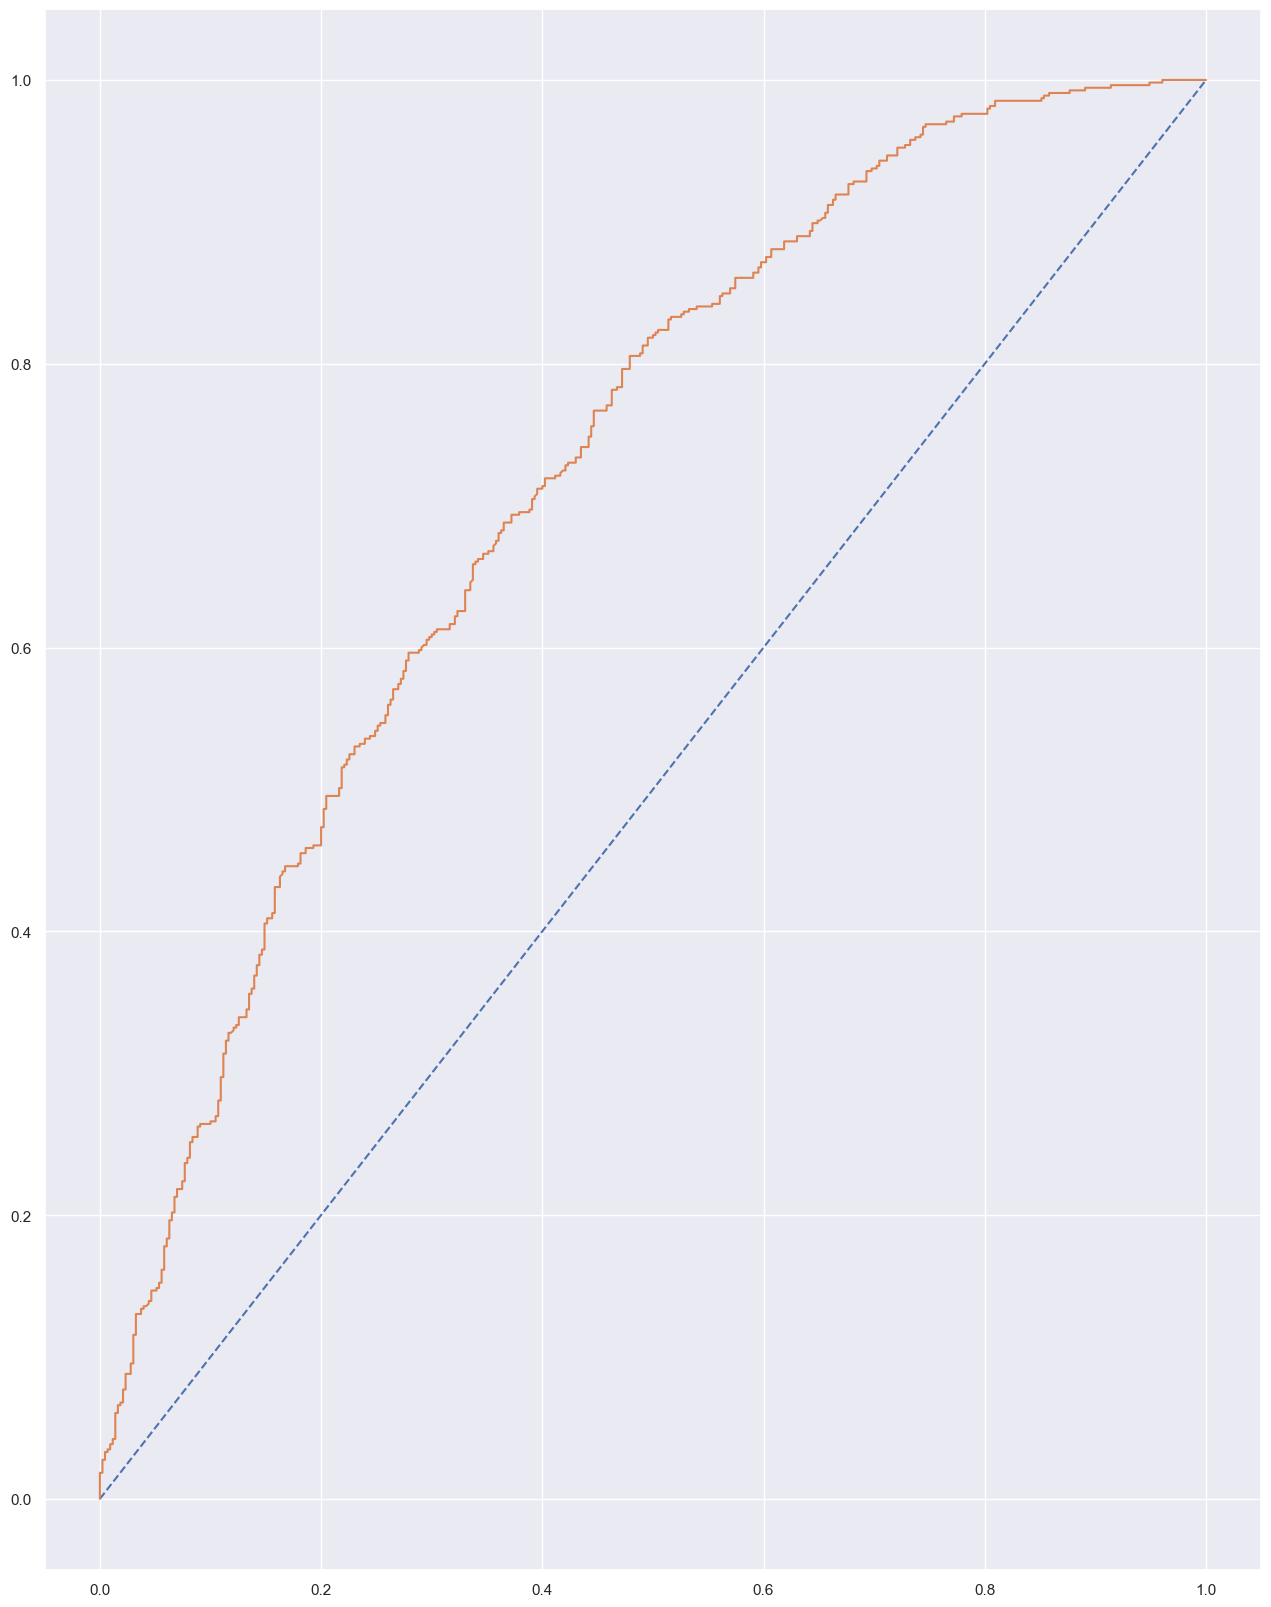

In [199]:
from sklearn.metrics import roc_curve, roc_auc_score
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [200]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.65311004784689

#### AUC and ROC for the test data

AUC: 0.721


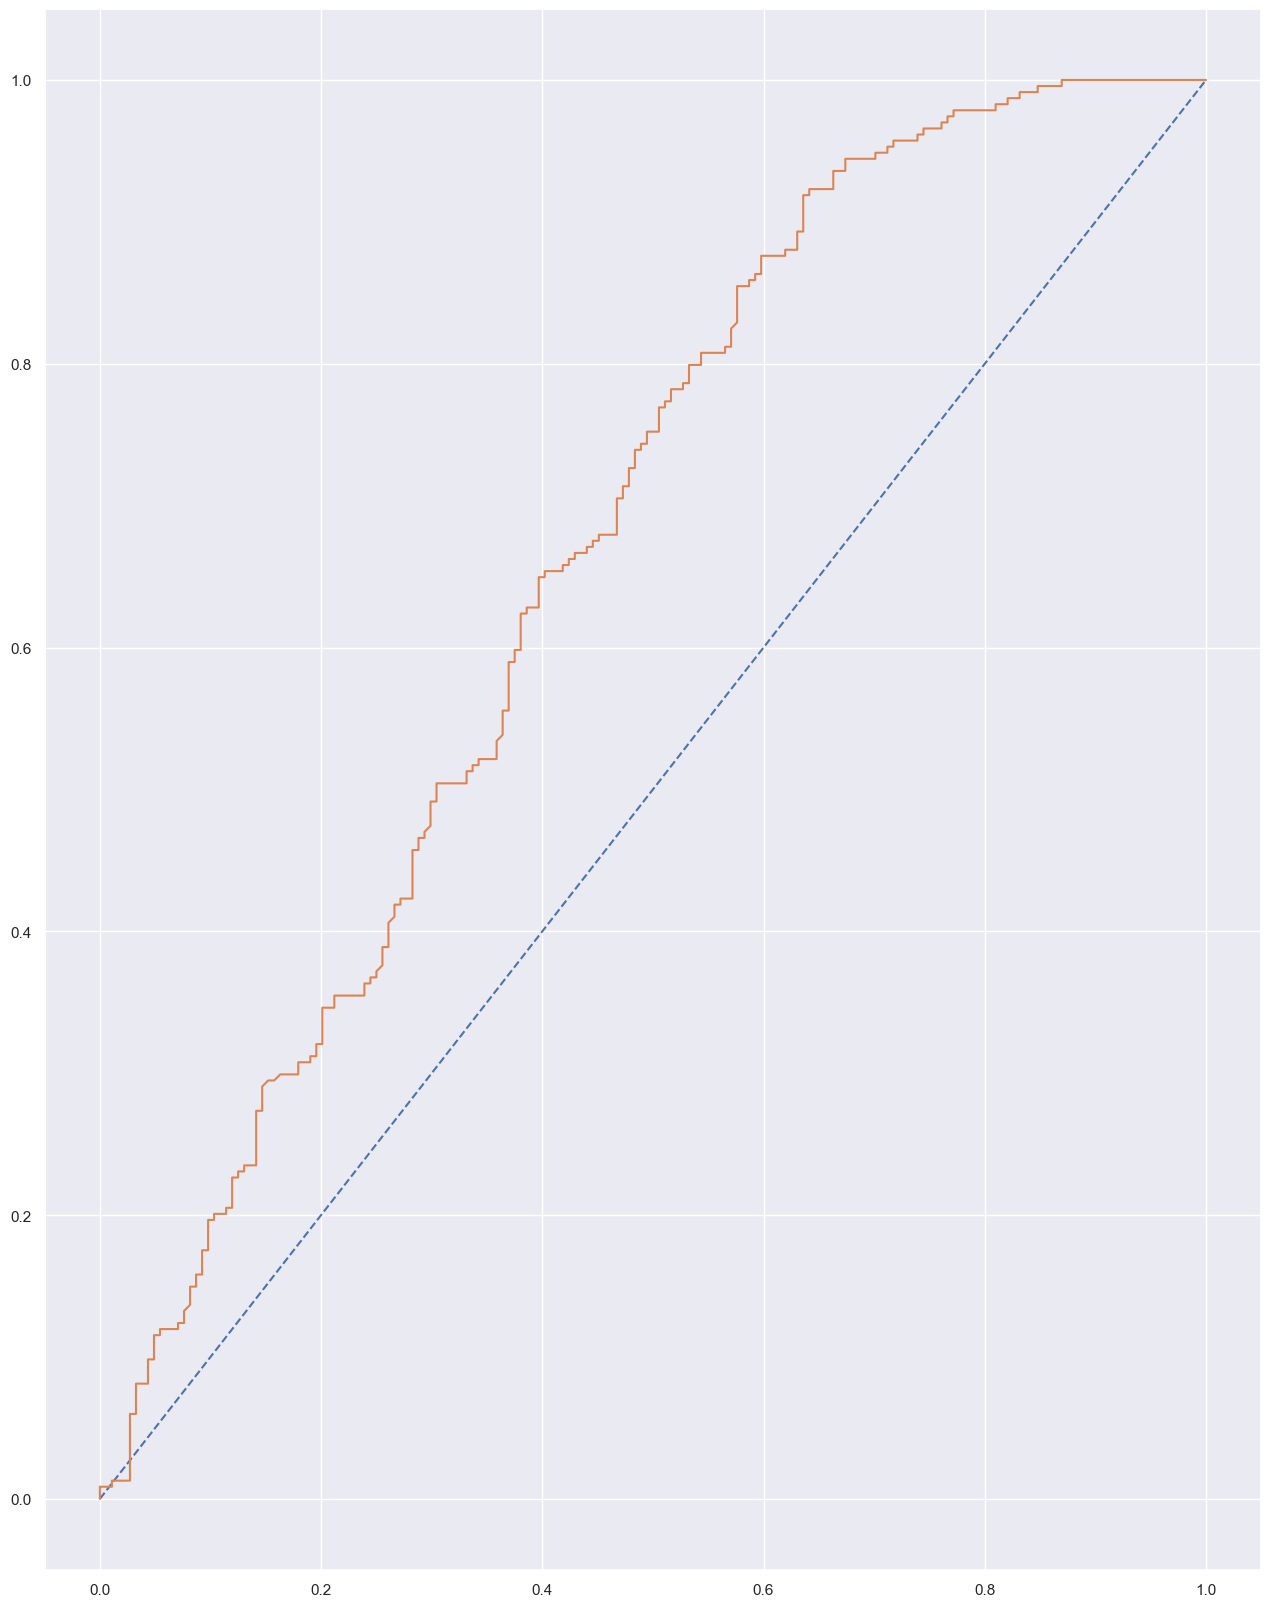

In [201]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Confusion Matrix for the training data

In [202]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
confusion_matrix(y_train, ytrain_predict)

array([[227, 203],
       [111, 434]], dtype=int64)

In [203]:
cm = confusion_matrix(y_train, ytrain_predict)
cm

array([[227, 203],
       [111, 434]], dtype=int64)

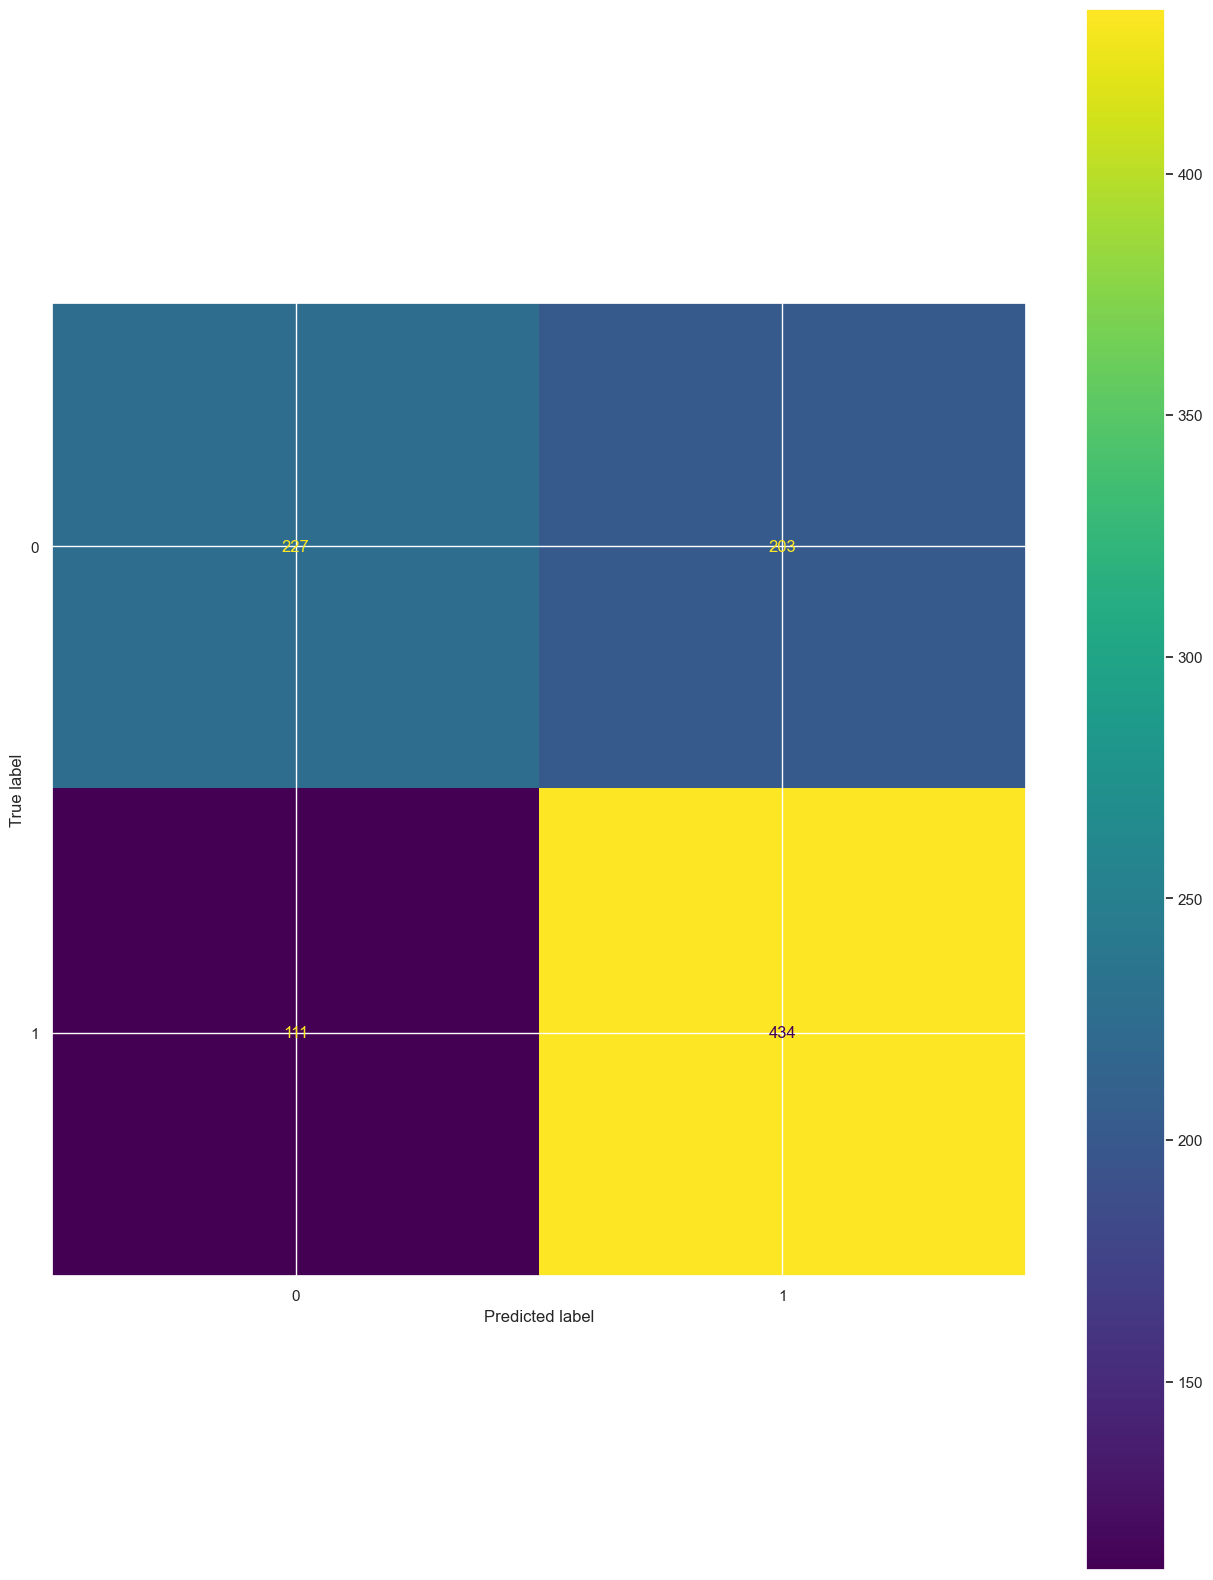

In [204]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [205]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.53      0.59       430
           1       0.68      0.80      0.73       545

    accuracy                           0.68       975
   macro avg       0.68      0.66      0.66       975
weighted avg       0.68      0.68      0.67       975



#### Confusion Matrix for test data

In [206]:
confusion_matrix(y_test, ytest_predict)

array([[ 86,  98],
       [ 47, 187]], dtype=int64)

In [207]:
cm = confusion_matrix(y_test, ytest_predict)
cm

array([[ 86,  98],
       [ 47, 187]], dtype=int64)

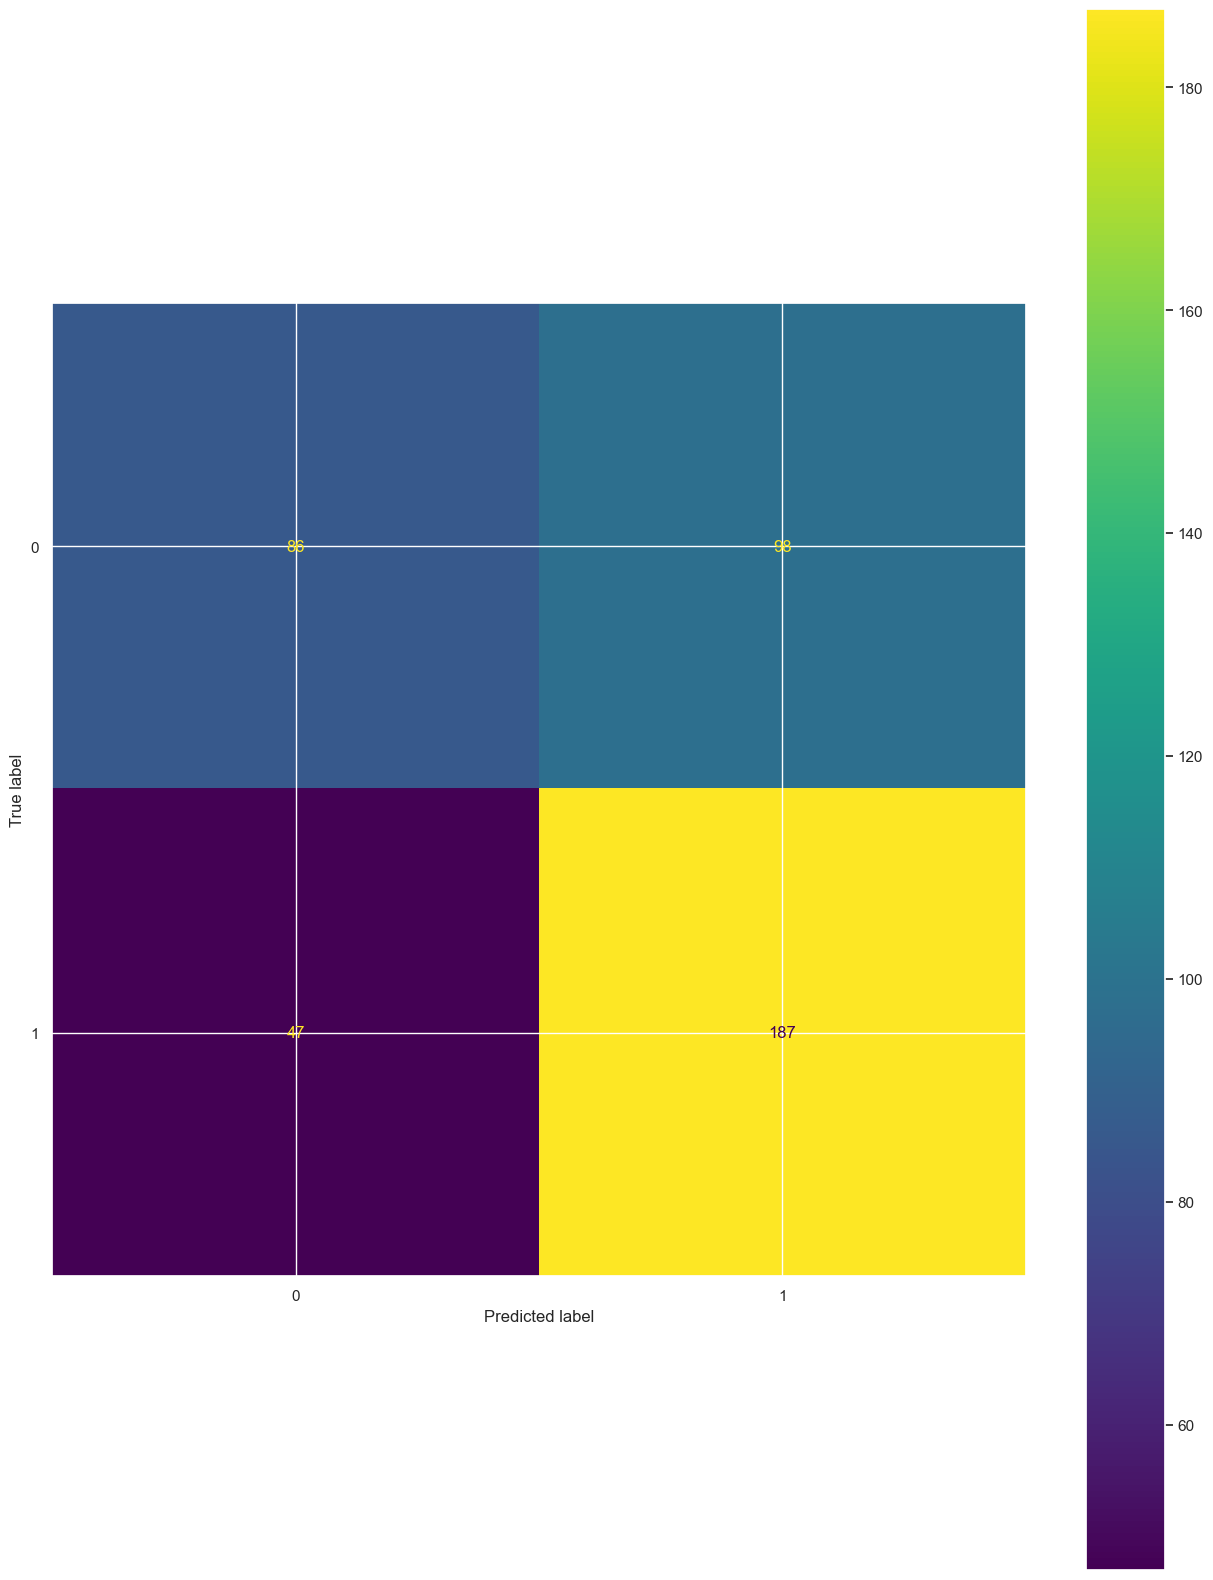

In [208]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [209]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.65      0.47      0.54       184
           1       0.66      0.80      0.72       234

    accuracy                           0.65       418
   macro avg       0.65      0.63      0.63       418
weighted avg       0.65      0.65      0.64       418



# LDA (linear discriminant analysis)

In [210]:
X = df2.drop("Contraceptive_method_used",axis=1)
Y = df2.pop("Contraceptive_method_used")

In [211]:
Y.value_counts()

Contraceptive_method_used
1    779
0    614
Name: count, dtype: int64

In [212]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [213]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (975, 9)
Number of rows and columns of the training set for the dependent variable: (975,)
Number of rows and columns of the test set for the independent variables: (418, 9)
Number of rows and columns of the test set for the dependent variable: (418,)


In [214]:
from sklearn.preprocessing import StandardScaler
stand_scal = StandardScaler()
X_train = stand_scal.fit_transform(X_train)
X_test = stand_scal.transform (X_test)

In [215]:
#Build LDA Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

#### Prediction

In [216]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

#### Training Data and Test Data Confusion Matrix Comparison

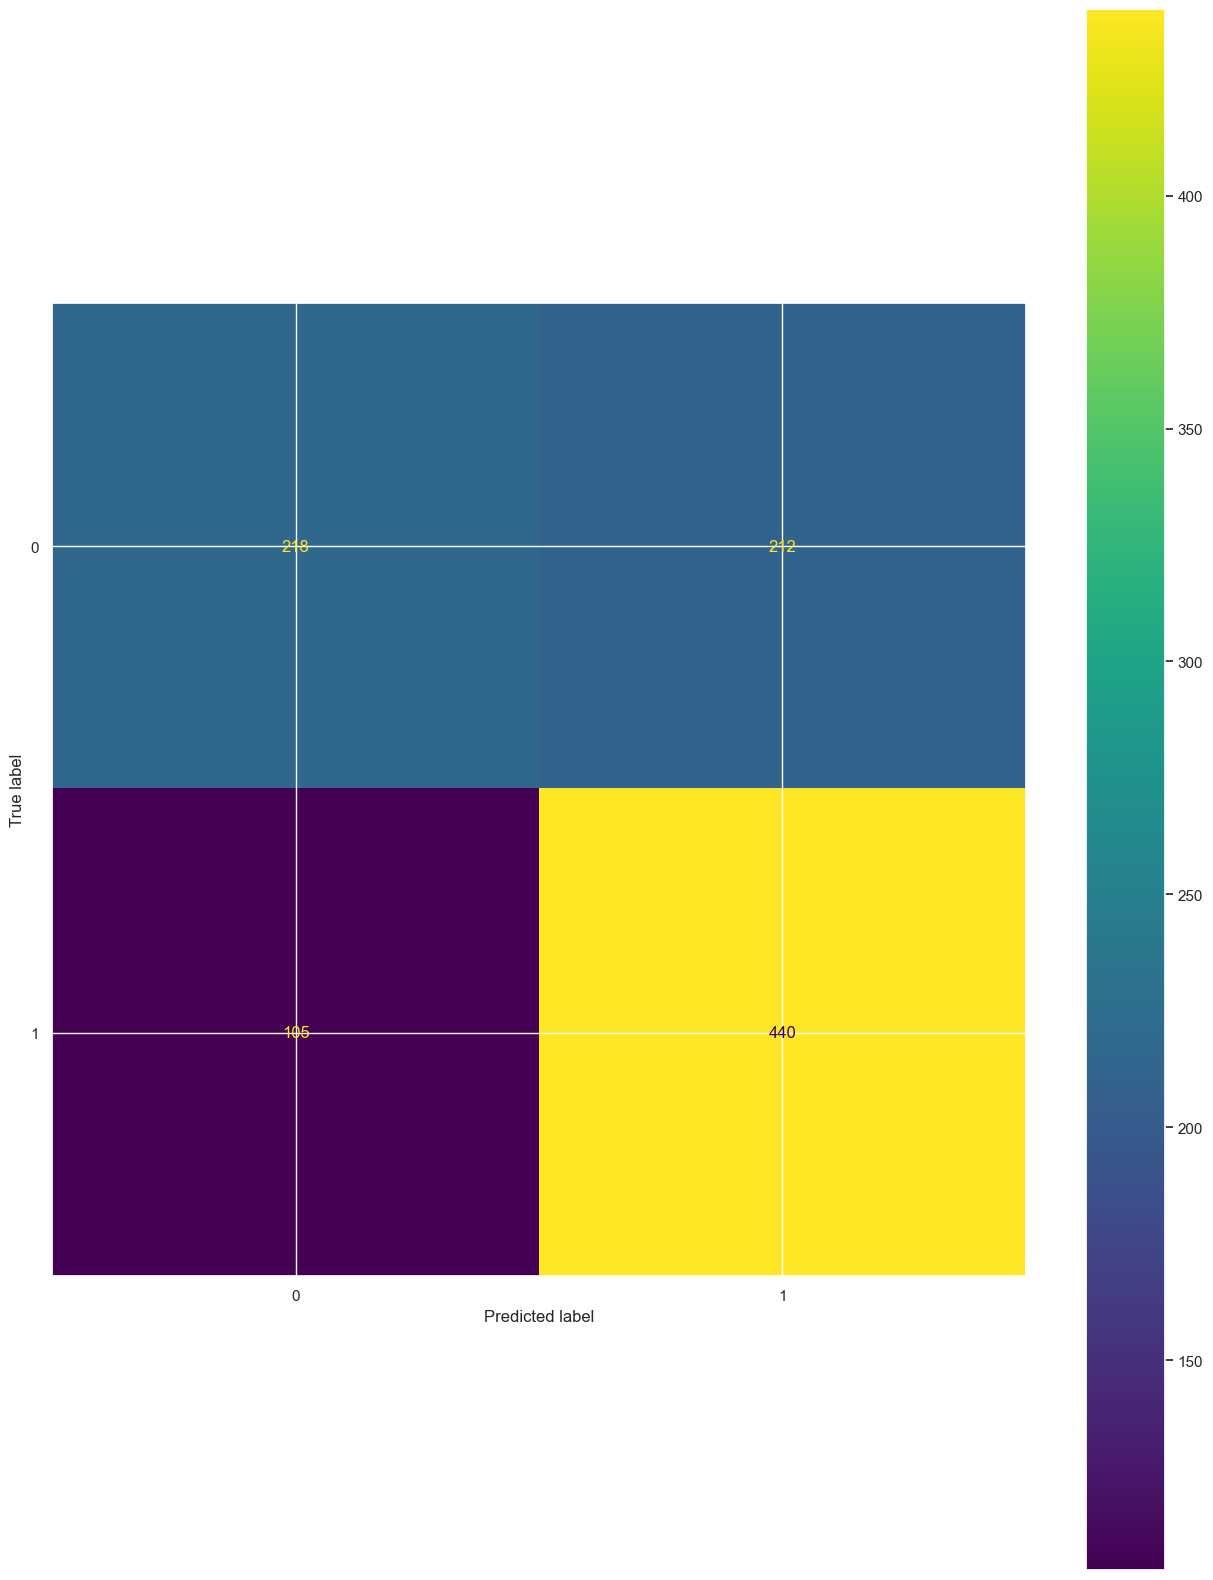

In [217]:
## Confusion matrix on the training data
cm = confusion_matrix(Y_train, pred_class_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

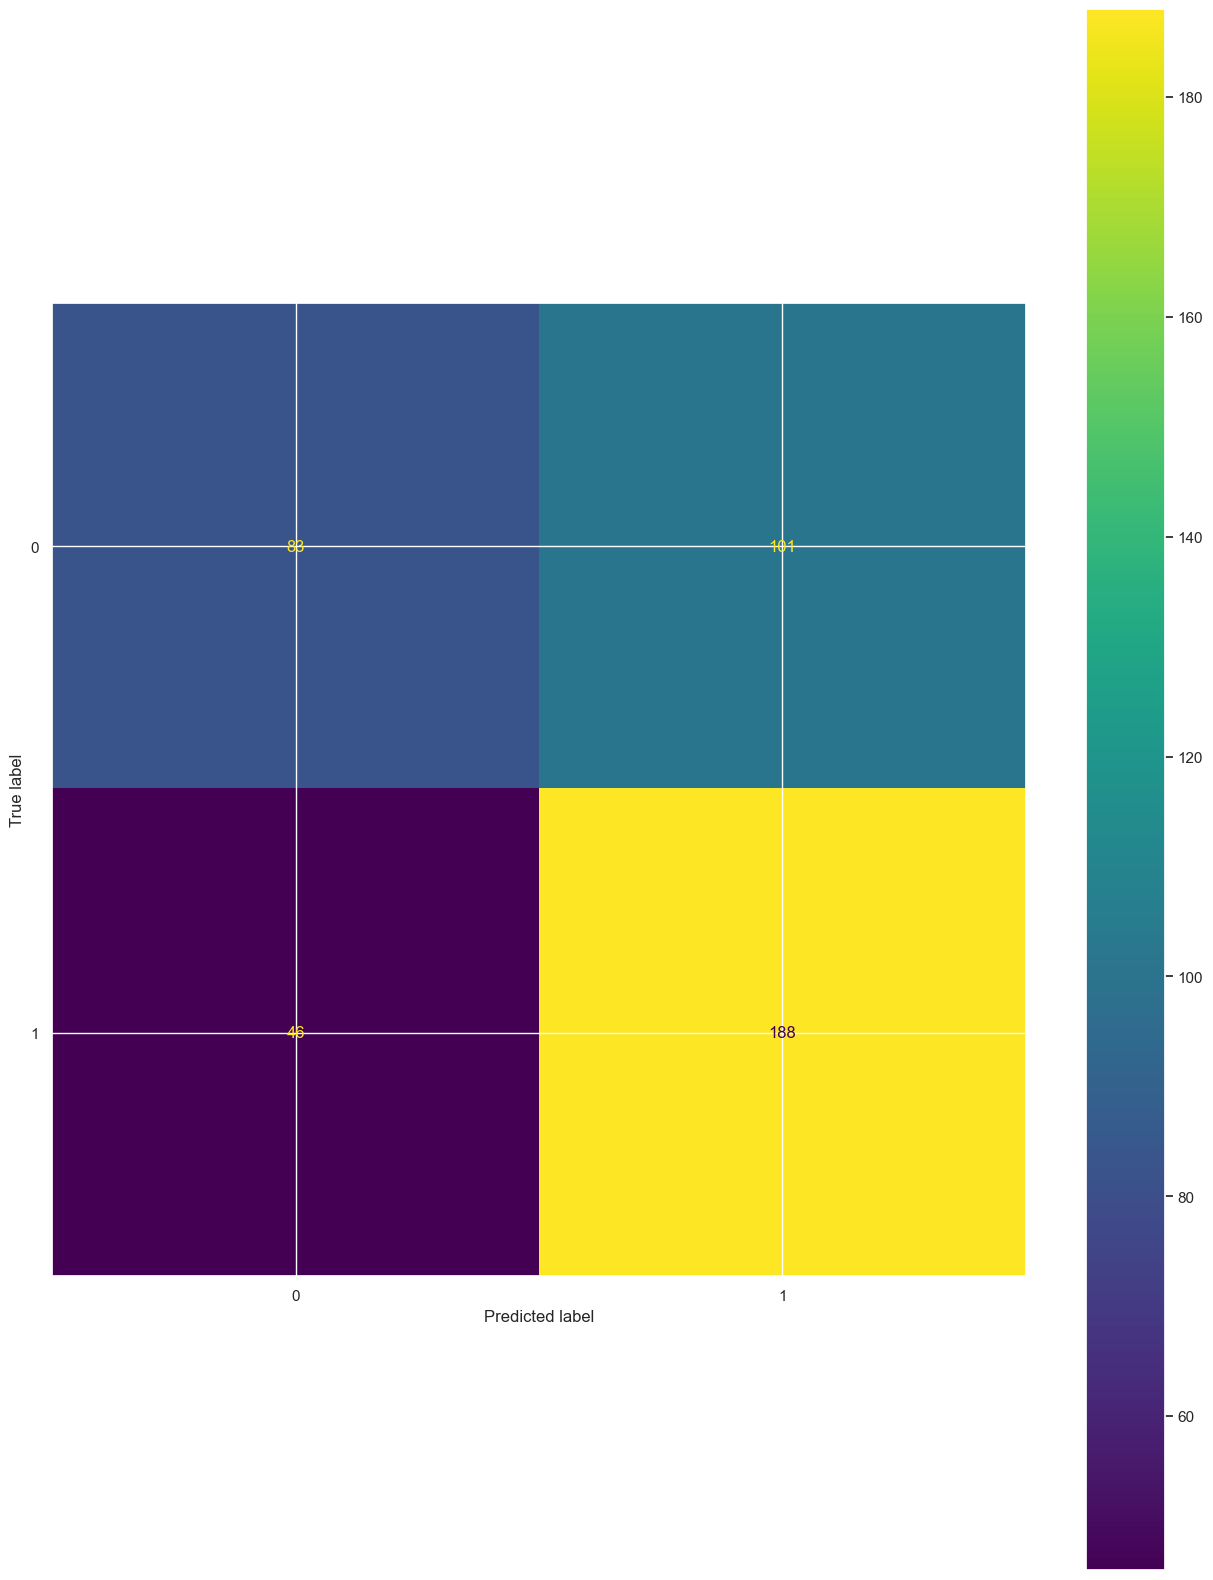

In [218]:
## Confusion matrix on the testing data
cm = confusion_matrix(Y_test, pred_class_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

#### Training Data and Test Data Classification Report Comparison

In [219]:
from sklearn import metrics
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.51      0.58       430
           1       0.67      0.81      0.74       545

    accuracy                           0.67       975
   macro avg       0.67      0.66      0.66       975
weighted avg       0.67      0.67      0.67       975
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.45      0.53       184
           1       0.65      0.80      0.72       234

    accuracy                           0.65       418
   macro avg       0.65      0.63      0.62       418
weighted avg       0.65      0.65      0.64       418
 



#### Probability prediction for the training and test data

In [220]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.721
AUC for the Test Data: 0.665


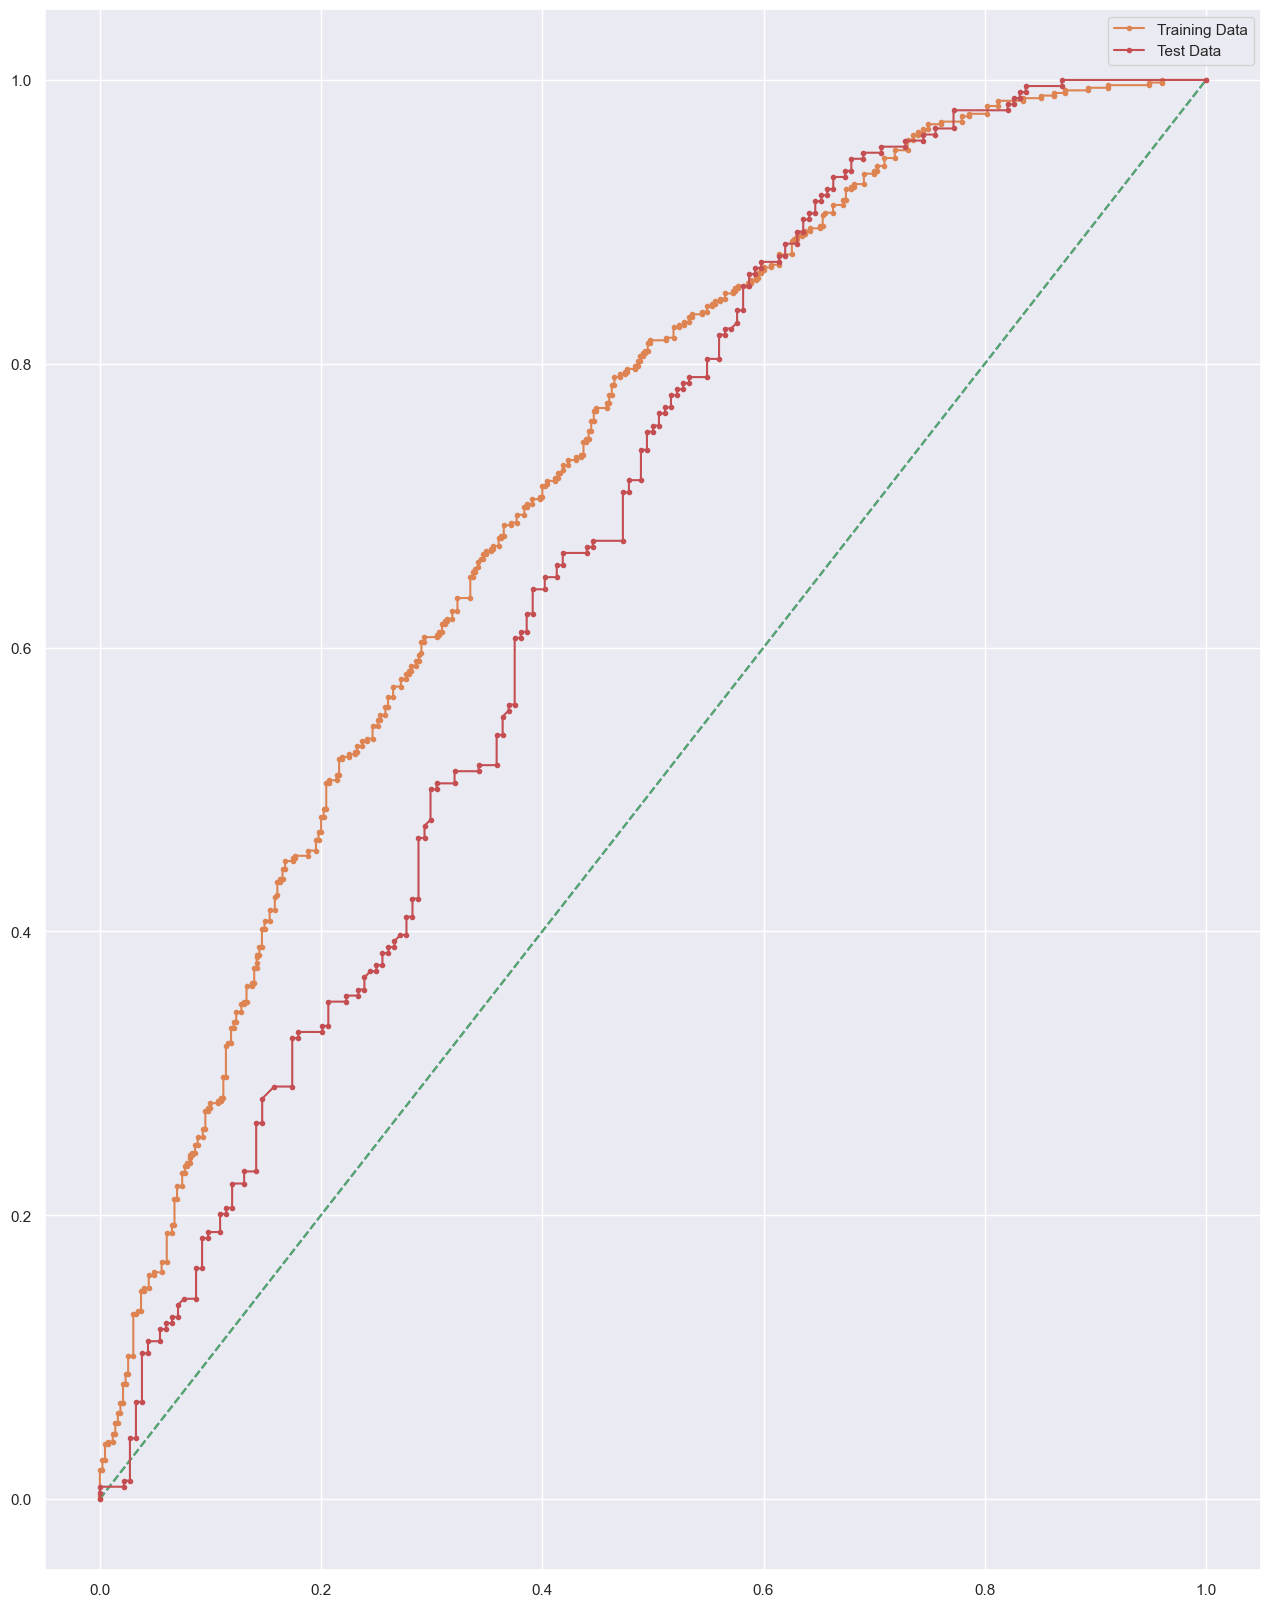

In [221]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

#### Generate Coefficients and intercept for the Linear Discriminant Function

In [222]:
#intercept value
clf.intercept_ 

array([0.28061949])

In [223]:
#coefficients for the Linear Discriminant Function
clf.coef_

array([[-0.60339613,  0.52338463,  0.03285636,  0.76509766, -0.16003565,
        -0.07157479,  0.11415193,  0.31922318,  0.09435841]])

In [224]:
X.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure '],
      dtype='object')

In [225]:
a=clf.coef_
np.round(a,2) # rounded up coefficients 

array([[-0.6 ,  0.52,  0.03,  0.77, -0.16, -0.07,  0.11,  0.32,  0.09]])

In [226]:
# clf is your logistic regression model
intercept_value = clf.intercept_[0]  # Extracting the intercept value
coefficients = clf.coef_[0]  # Extracting the coefficients
columns = X.columns  # Extracting the column names

# Constructing the LDF equation
ldf_equation = f"LDF = {intercept_value:.4f} + "
ldf_equation += " + ".join([f"({coeff:.4f} * {col})" for coeff, col in zip(coefficients, columns)])

print(ldf_equation)


LDF = 0.2806 + (-0.6034 * Wife_age) + (0.5234 * Wife_ education) + (0.0329 * Husband_education) + (0.7651 * No_of_children_born) + (-0.1600 * Wife_religion) + (-0.0716 * Wife_Working) + (0.1142 * Husband_Occupation) + (0.3192 * Standard_of_living_index) + (0.0944 * Media_exposure )


In [227]:
#Computation of Discriminant Scores/LDF for each row of data


DS=[]
coef=[-0.60339613,  0.52338463,  0.03285636,  0.76509766, -0.16003565,
        -0.07157479,  0.11415193,  0.31922318,  0.09435841] # Coefficients 
for p in range(len(X)):
    s3=0
    for q in range(X.shape[1]):
        s3 = s3 + (X.iloc[p, q] * coef[q]) # Building the LDF equation 
    s3=s3+0.28061949
    DS.append(s3)
    
    

In [228]:
s1 = 0  # Counter for DS >= 0
s2 = 0  # Counter for DS < 0

for i in range(len(DS)):
    print("FOR Row:", i, " ", X.iloc[i, :])
    print()

    if DS[i] >= 0:
        print("--> { DS: ", DS[i], " >= 0 , Classify as 1}")
        s1 += 1
    else:
        print("--> { DS: ", DS[i], " < 0 , Classify as 0}")
        s2 += 1

    print("------------------------------------------------------------------------------------------")

# Print summary
print(f"Total rows classified as 1: {s1}")
print(f"Total rows classified as 0: {s2}")


FOR Row: 0   Wife_age                    24.0
Wife_ education              2.0
Husband_education            3.0
No_of_children_born          3.0
Wife_religion                1.0
Wife_Working                 0.0
Husband_Occupation           2.0
Standard_of_living_index     3.0
Media_exposure               1.0
Name: 0, dtype: float64

--> { DS:  -9.639960149999999  < 0 , Classify as 0}
------------------------------------------------------------------------------------------
FOR Row: 1   Wife_age                    45.0
Wife_ education              1.0
Husband_education            3.0
No_of_children_born         10.0
Wife_religion                1.0
Wife_Working                 0.0
Husband_Occupation           3.0
Standard_of_living_index     4.0
Media_exposure               1.0
Name: 1, dtype: float64

--> { DS:  -17.045604780000005  < 0 , Classify as 0}
------------------------------------------------------------------------------------------
FOR Row: 2   Wife_age                    43

#### Classification by Probability

In [230]:
pred_prob=model.predict_proba(X)#Posterior Probability for each row

In [231]:
pred_prob[:,1]

array([6.50714197e-05, 3.95537767e-08, 2.24781810e-08, ...,
       1.47205571e-08, 3.25488448e-07, 2.22943610e-03])

In [232]:
s3, s4 = 0, 0

for i in range(len(pred_prob[:, 1])):
    print("FOR Row:", i, " ", X.iloc[i, :])
    print()

    if pred_prob[:, 1][i] >= 0.5:
        print("--> { prob(Y=1|X) =", pred_prob[:, 1][i], ">= 0.5 , Classify as 1 }")
        s3 += 1
    else:
        print("--> { prob(Y=1|X) =", pred_prob[:, 1][i], "< 0.5 , Classify as 0 }")
        s4 += 1

    print("------------------------------------------------------------------------------------------")

# Print summary
print(f"Total rows classified as 1: {s3}")
print(f"Total rows classified as 0: {s4}")


FOR Row: 0   Wife_age                    24.0
Wife_ education              2.0
Husband_education            3.0
No_of_children_born          3.0
Wife_religion                1.0
Wife_Working                 0.0
Husband_Occupation           2.0
Standard_of_living_index     3.0
Media_exposure               1.0
Name: 0, dtype: float64

--> { prob(Y=1|X) = 6.507141974337668e-05 < 0.5 , Classify as 0 }
------------------------------------------------------------------------------------------
FOR Row: 1   Wife_age                    45.0
Wife_ education              1.0
Husband_education            3.0
No_of_children_born         10.0
Wife_religion                1.0
Wife_Working                 0.0
Husband_Occupation           3.0
Standard_of_living_index     4.0
Media_exposure               1.0
Name: 1, dtype: float64

--> { prob(Y=1|X) = 3.955377666674104e-08 < 0.5 , Classify as 0 }
------------------------------------------------------------------------------------------
FOR Row: 2   Wif

#### Using LDA for Dimensionality Reduction

In [236]:
lda_model = LinearDiscriminantAnalysis(n_components = 1)# as only two classes are there for prediction thus 2-1=1 component
X_train_lda = lda_model.fit_transform(X_train, Y_train)
X_test_lda = lda_model.transform(X_test)

In [237]:
print(X_train_lda.shape)
print(X_test_lda.shape)

(975, 1)
(418, 1)


In [238]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_lda, Y_train)
y_pred = model.predict(X_test_lda)

In [239]:
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,y_pred),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.63      0.45      0.53       184
           1       0.65      0.79      0.71       234

    accuracy                           0.64       418
   macro avg       0.64      0.62      0.62       418
weighted avg       0.64      0.64      0.63       418
 



# CART

In [240]:
#Getting train and test variables
# independent variables
X = df2_copy.drop(["Contraceptive_method_used"], axis=1)
# dependent variable
y = df2_copy["Contraceptive_method_used"]

In [241]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)


In [242]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs',8083+3465)

X_train (975, 9)
X_test (418, 9)
train_labels (975,)
test_labels (418,)
Total Obs 11548


In [243]:
# Initialise a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [244]:
# Fit the model
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

In [245]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [246]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))



                               Imp
Wife_age                  0.291091
No_of_children_born       0.241224
Wife_ education           0.106970
Husband_Occupation        0.106614
Standard_of_living_index  0.103123
Husband_education         0.051435
Wife_Working              0.048122
Wife_religion             0.034137
Media_exposure            0.017285


In [247]:
y_predict = dt_model.predict(X_test)

In [248]:
y_predict.shape

(418,)

#### Adding Tuning Parameters

In [249]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [1,5,10,15,20],
              'min_samples_leaf':[1,5,10,15,20],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, train_labels)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 15, 20]},
             verbose=True)

In [250]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10, max_features='sqrt',
                       min_samples_leaf=15, random_state=1)

In [251]:
reg_dt_model = DecisionTreeClassifier( ccp_alpha=0.001, max_depth=10, max_features='sqrt',
                       min_samples_leaf=15, random_state=1)
reg_dt_model.fit(X_train, train_labels)


DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10, max_features='sqrt',
                       min_samples_leaf=15, random_state=1)

In [252]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

In [253]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                               Imp
No_of_children_born       0.459324
Wife_age                  0.317840
Wife_ education           0.155576
Husband_education         0.027978
Standard_of_living_index  0.017100
Wife_Working              0.011926
Husband_Occupation        0.010256
Wife_religion             0.000000
Media_exposure            0.000000


In [254]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [255]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (975,)
ytest_predict (418,)


In [256]:
ytest_predict

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,

In [257]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.17283951, 0.82716049],
       [0.14788732, 0.85211268],
       [0.30769231, 0.69230769],
       [0.17283951, 0.82716049],
       [0.14788732, 0.85211268],
       [0.29166667, 0.70833333],
       [0.62962963, 0.37037037],
       [0.74576271, 0.25423729],
       [1.        , 0.        ],
       [0.43333333, 0.56666667],
       [0.62962963, 0.37037037],
       [0.74576271, 0.25423729],
       [0.14788732, 0.85211268],
       [0.97058824, 0.02941176],
       [0.17283951, 0.82716049],
       [0.14788732, 0.85211268],
       [0.97058824, 0.02941176],
       [0.14788732, 0.85211268],
       [0.64705882, 0.35294118],
       [0.97058824, 0.02941176],
       [0.17283951, 0.82716049],
       [0.05882353, 0.94117647],
       [0.20689655, 0.79310345],
       [0.14788732, 0.85211268],
       [0.58333333, 0.41666667],
       [0.43333333, 0.56666667],
       [0.30769231, 0.69230769],
       [0.68888889, 0.31111111],
       [0.64705882, 0.35294118],
       [0.30769231, 0.69230769],
       [0.

In [258]:
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.172840  0.827160
1  0.147887  0.852113
2  0.307692  0.692308
3  0.172840  0.827160
4  0.147887  0.852113

AUC: 0.809


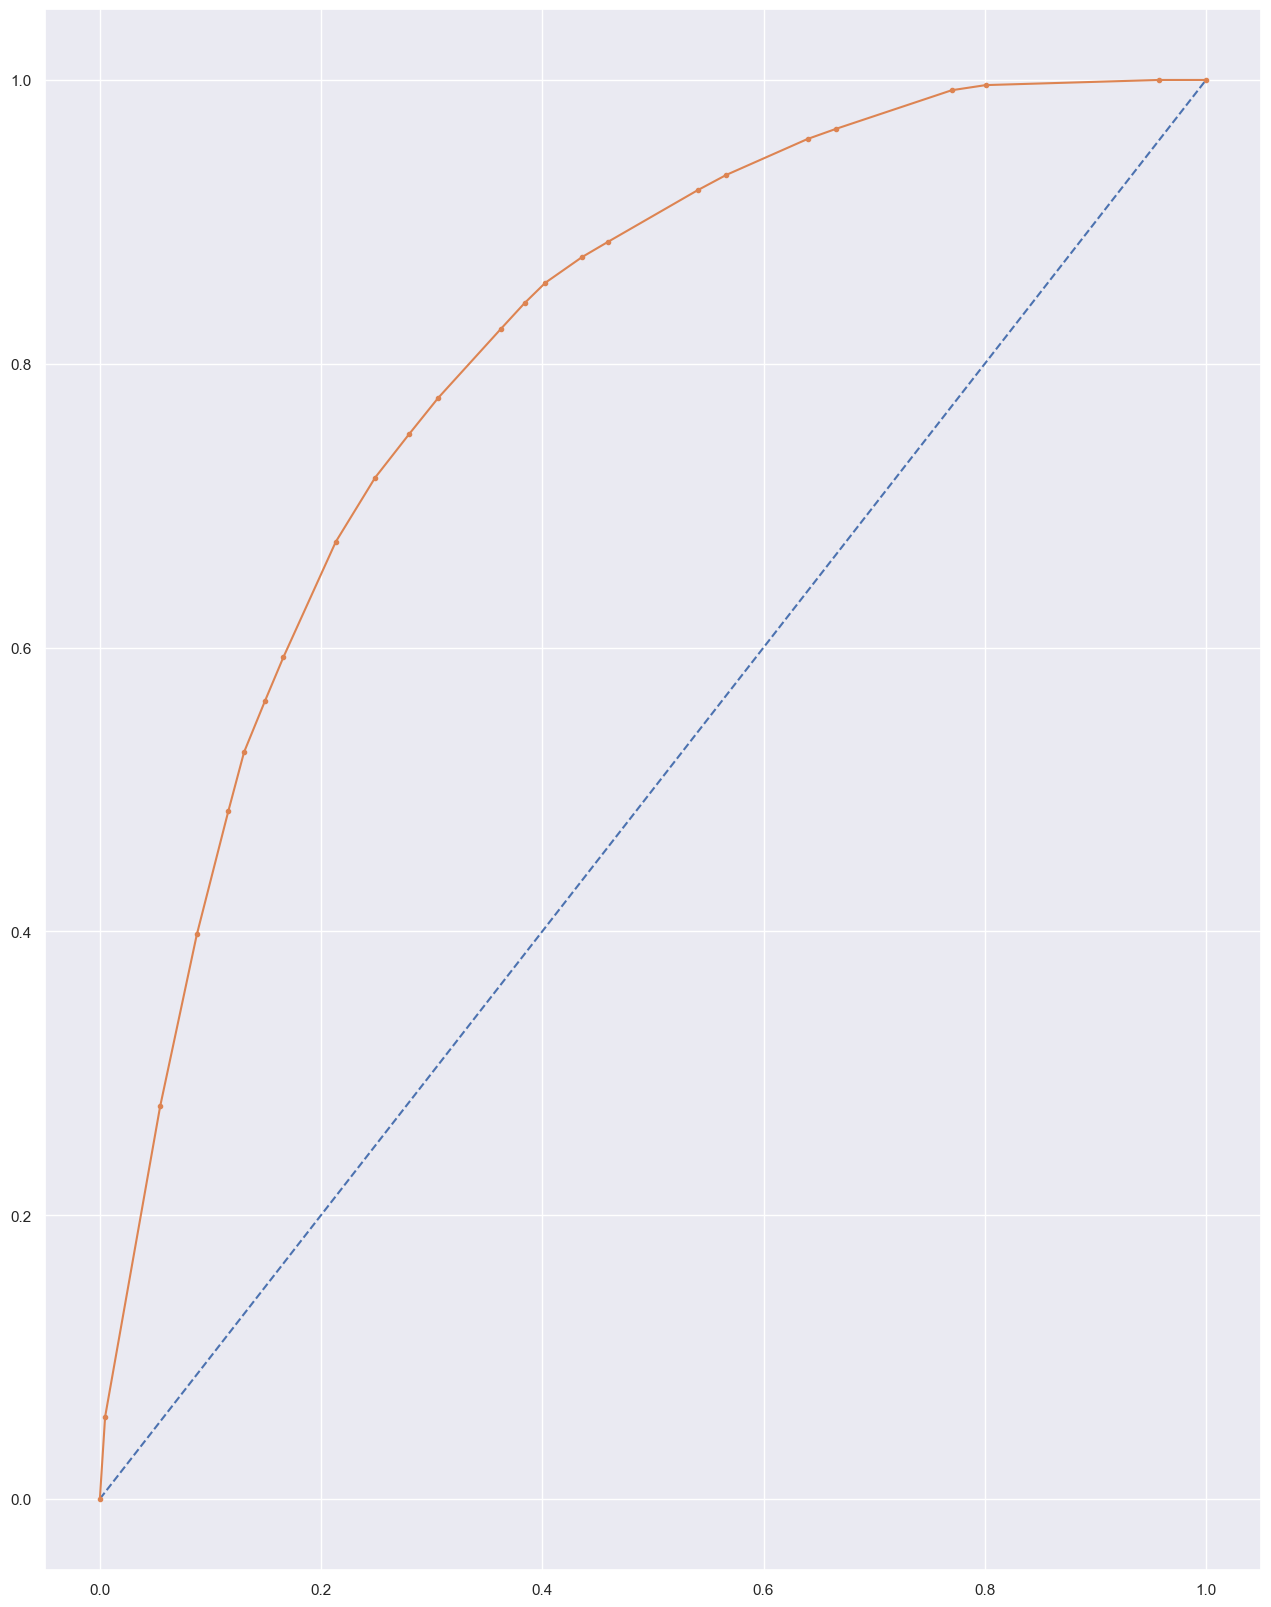

In [259]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.744


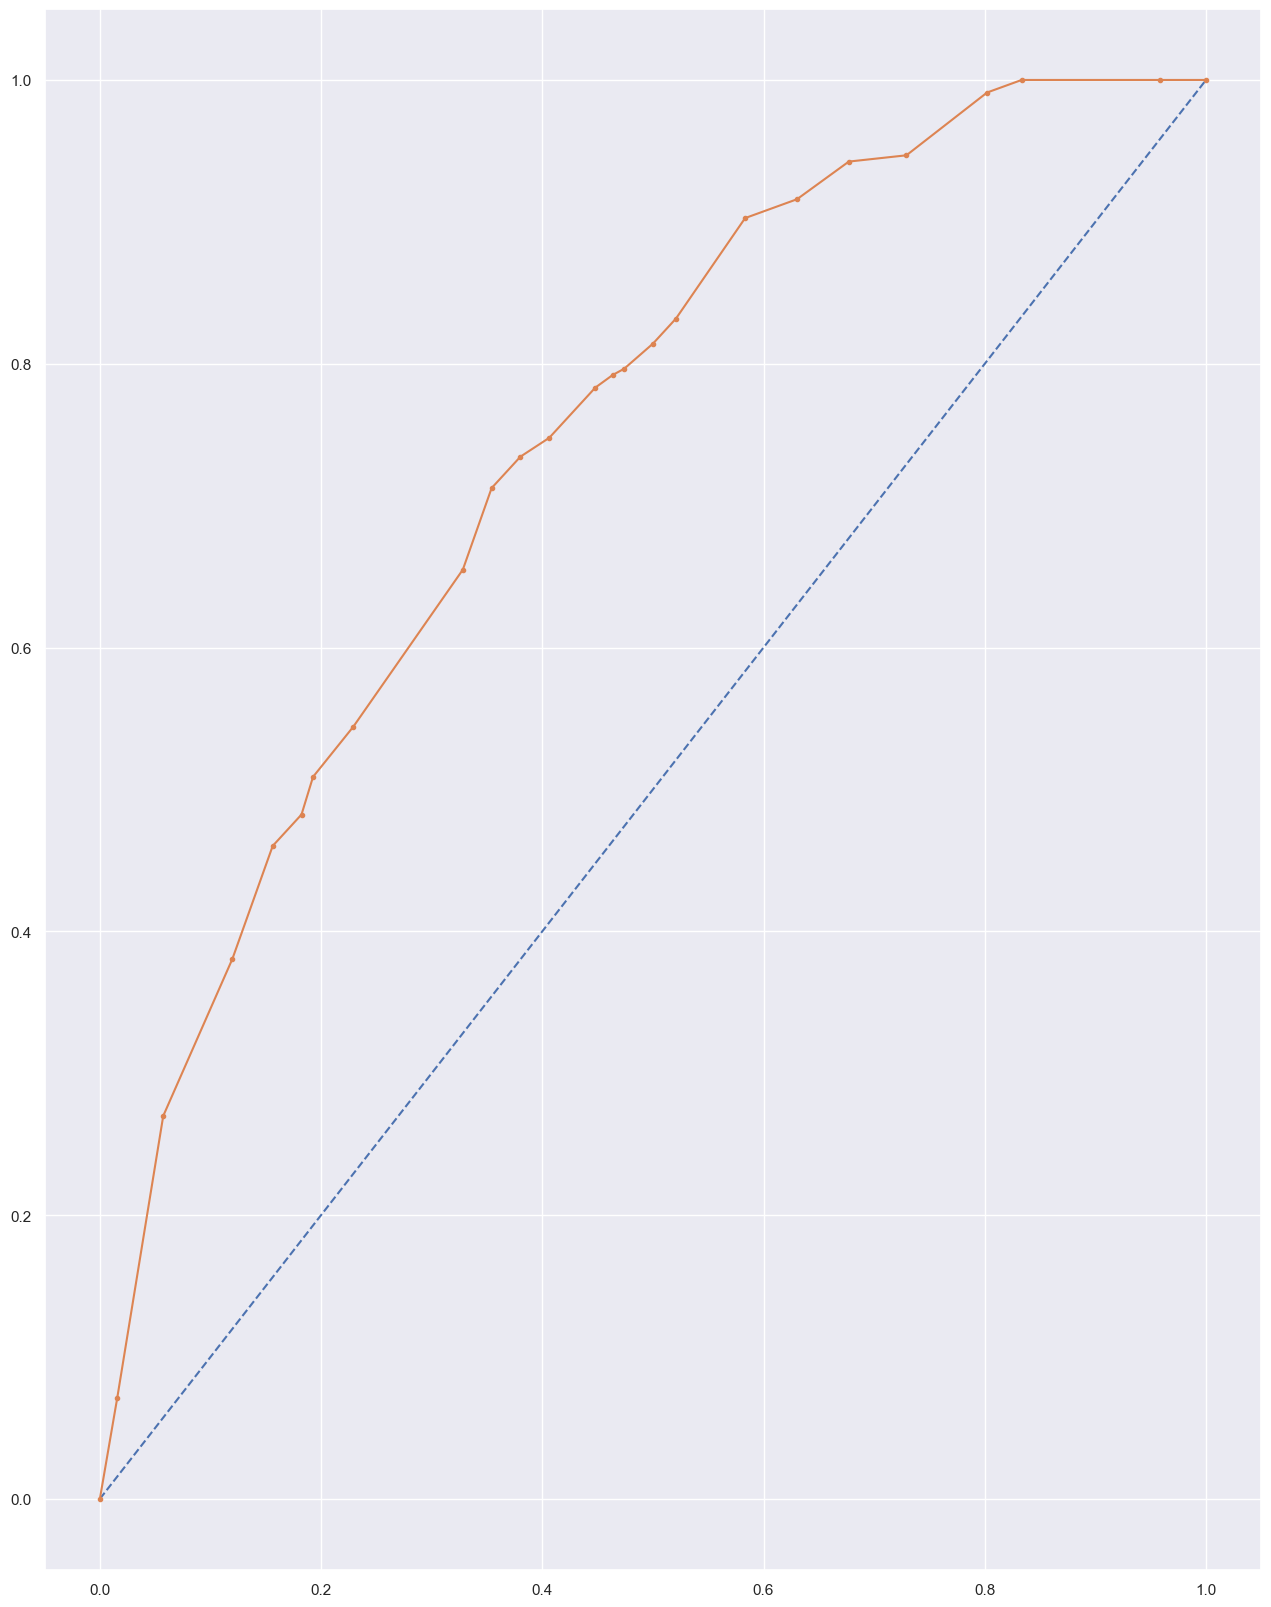

In [260]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [261]:
from sklearn.metrics import classification_report,confusion_matrix

In [262]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68       422
           1       0.74      0.84      0.79       553

    accuracy                           0.74       975
   macro avg       0.75      0.73      0.73       975
weighted avg       0.75      0.74      0.74       975



In [263]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.69      0.54      0.60       192
           1       0.67      0.79      0.72       226

    accuracy                           0.67       418
   macro avg       0.68      0.66      0.66       418
weighted avg       0.68      0.67      0.67       418



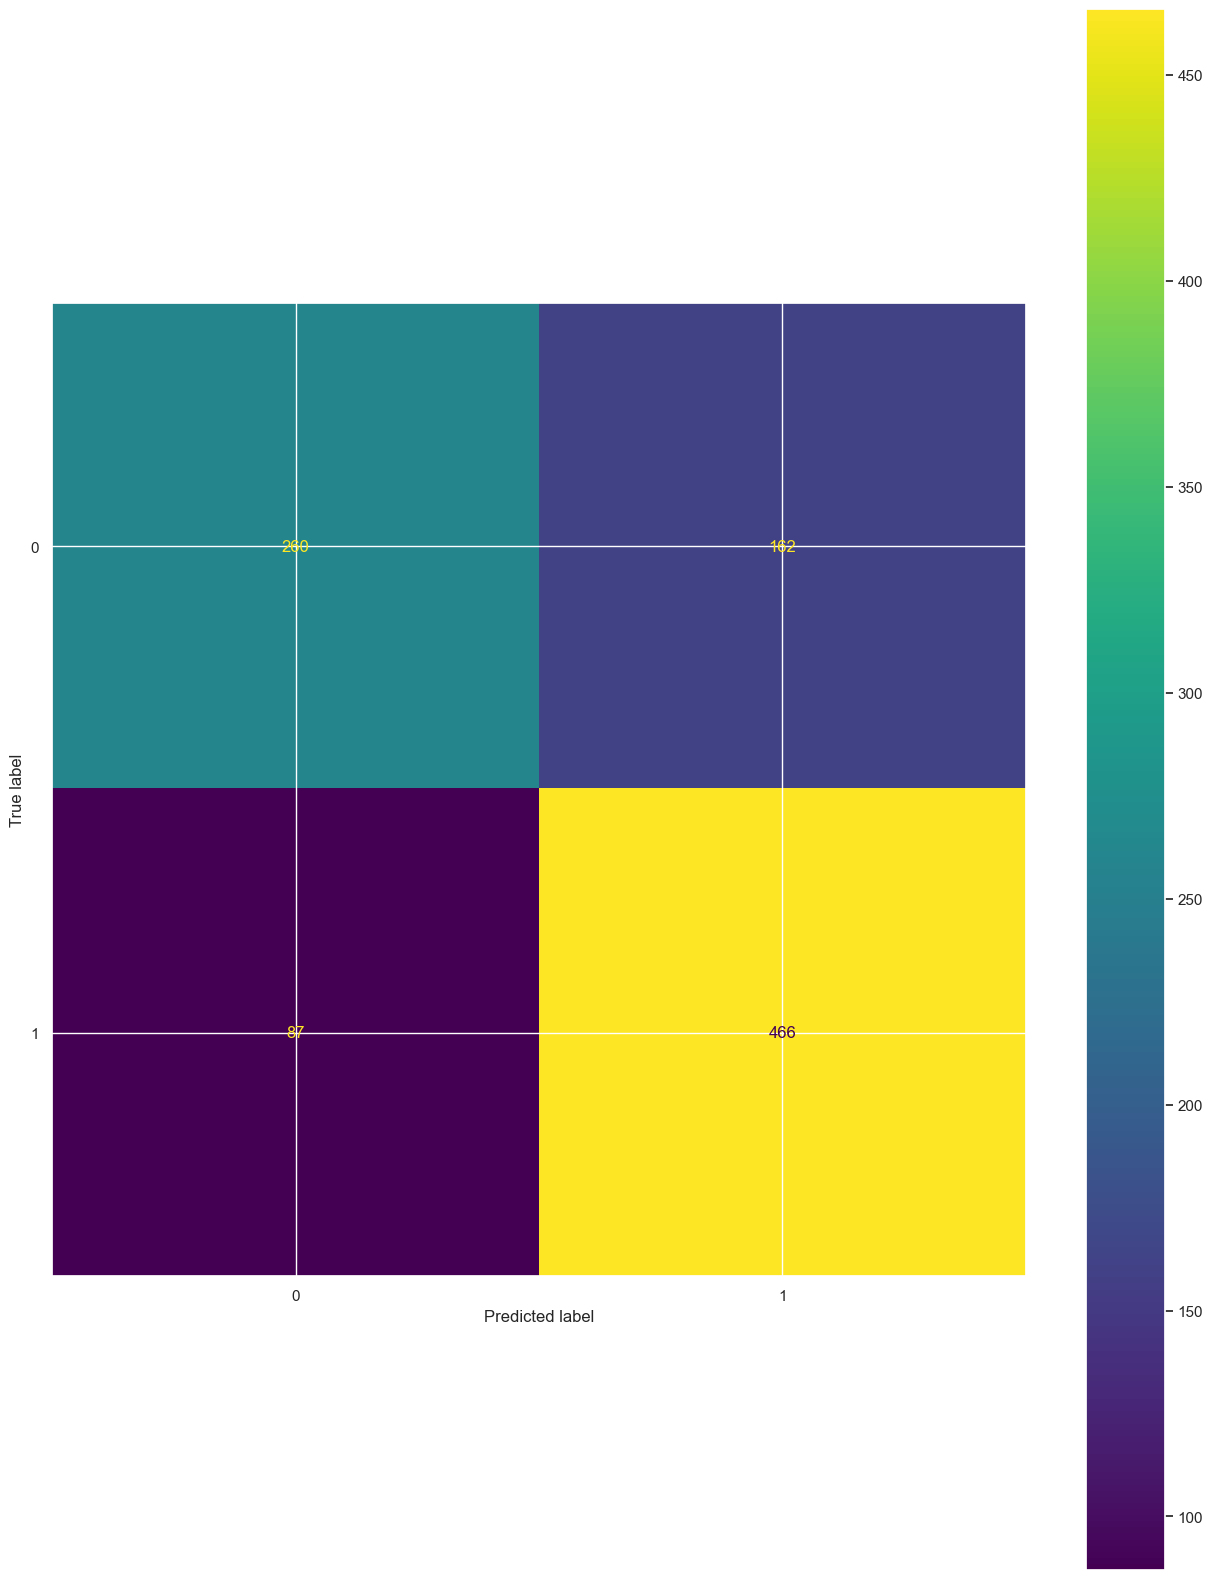

In [264]:
confusion_matrix(train_labels, ytrain_predict)
## Confusion matrix on the training data
cm_train = confusion_matrix(train_labels, ytrain_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_)
disp.plot()

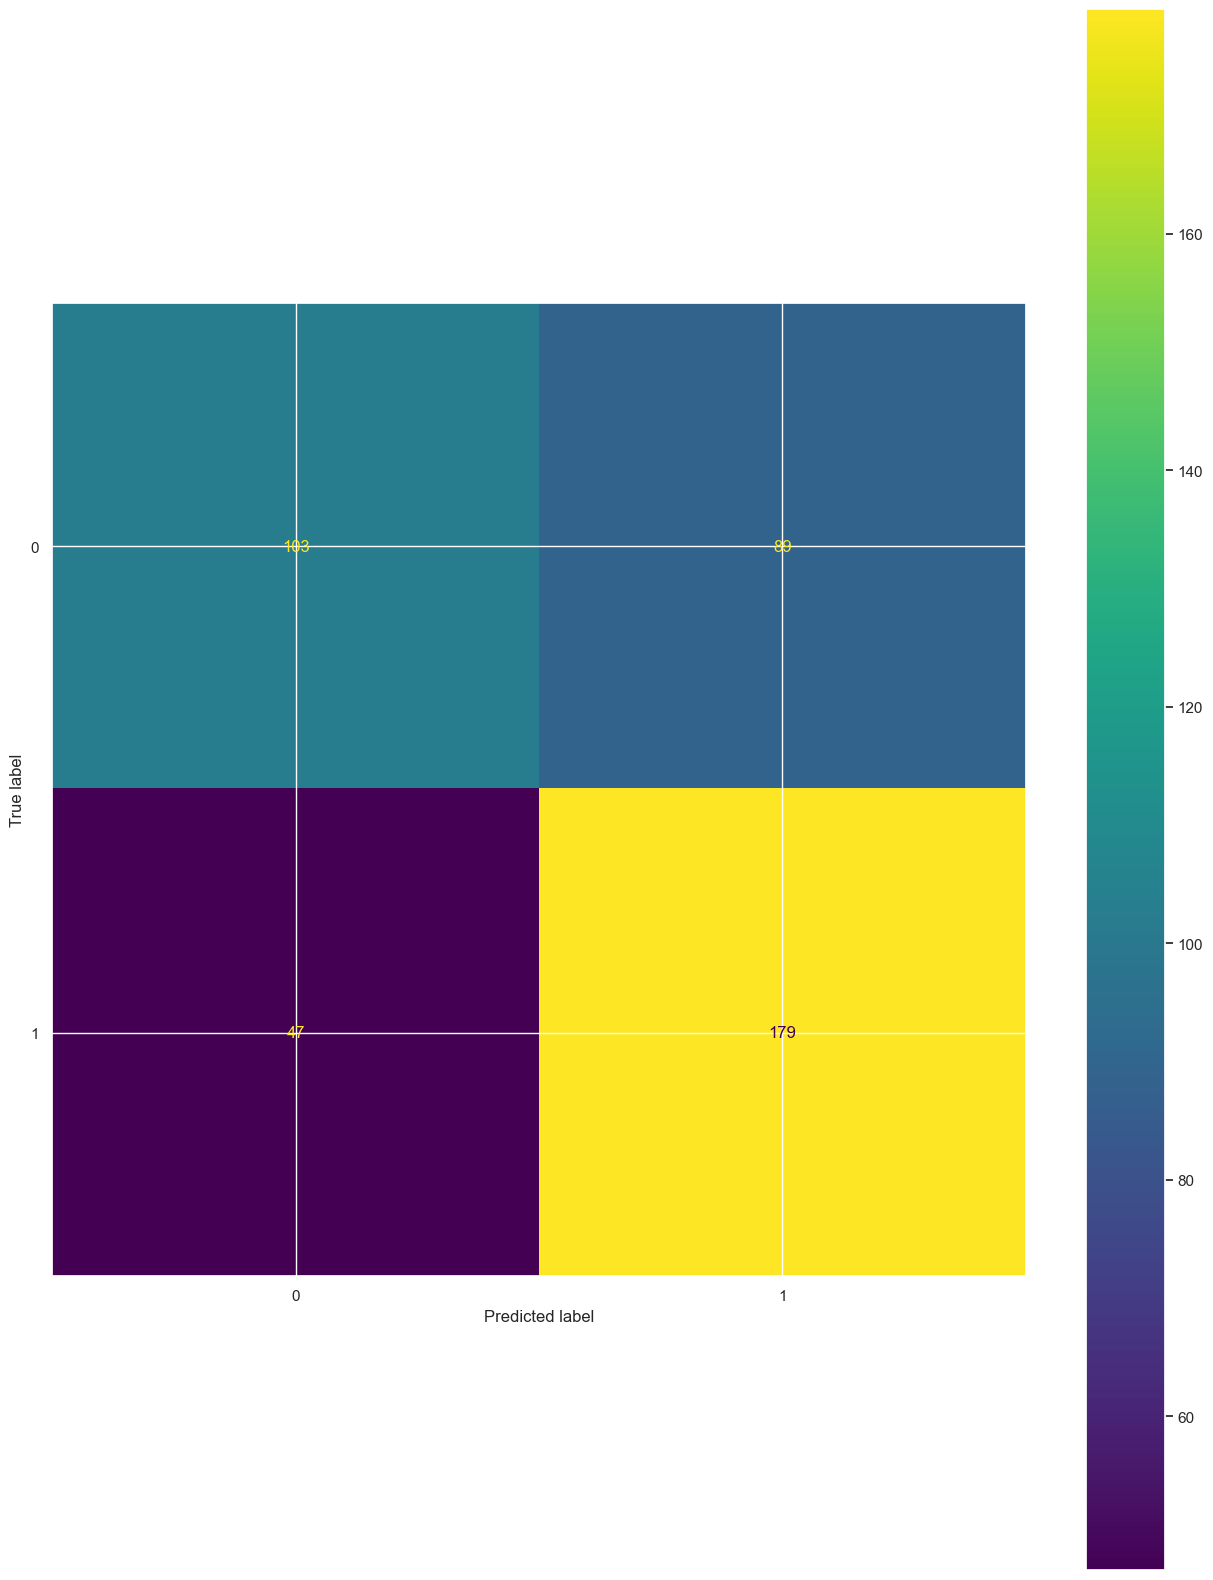

In [265]:
confusion_matrix(test_labels, ytest_predict)
## Confusion matrix on the testing data
cm_test = confusion_matrix(test_labels, ytest_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)
disp.plot()

In [266]:
reg_dt_model.score(X_train,train_labels)

0.7446153846153846

In [267]:
reg_dt_model.score(X_test,test_labels)

0.6746411483253588

# Full Decision Tree

# Regularized pruned decision tree

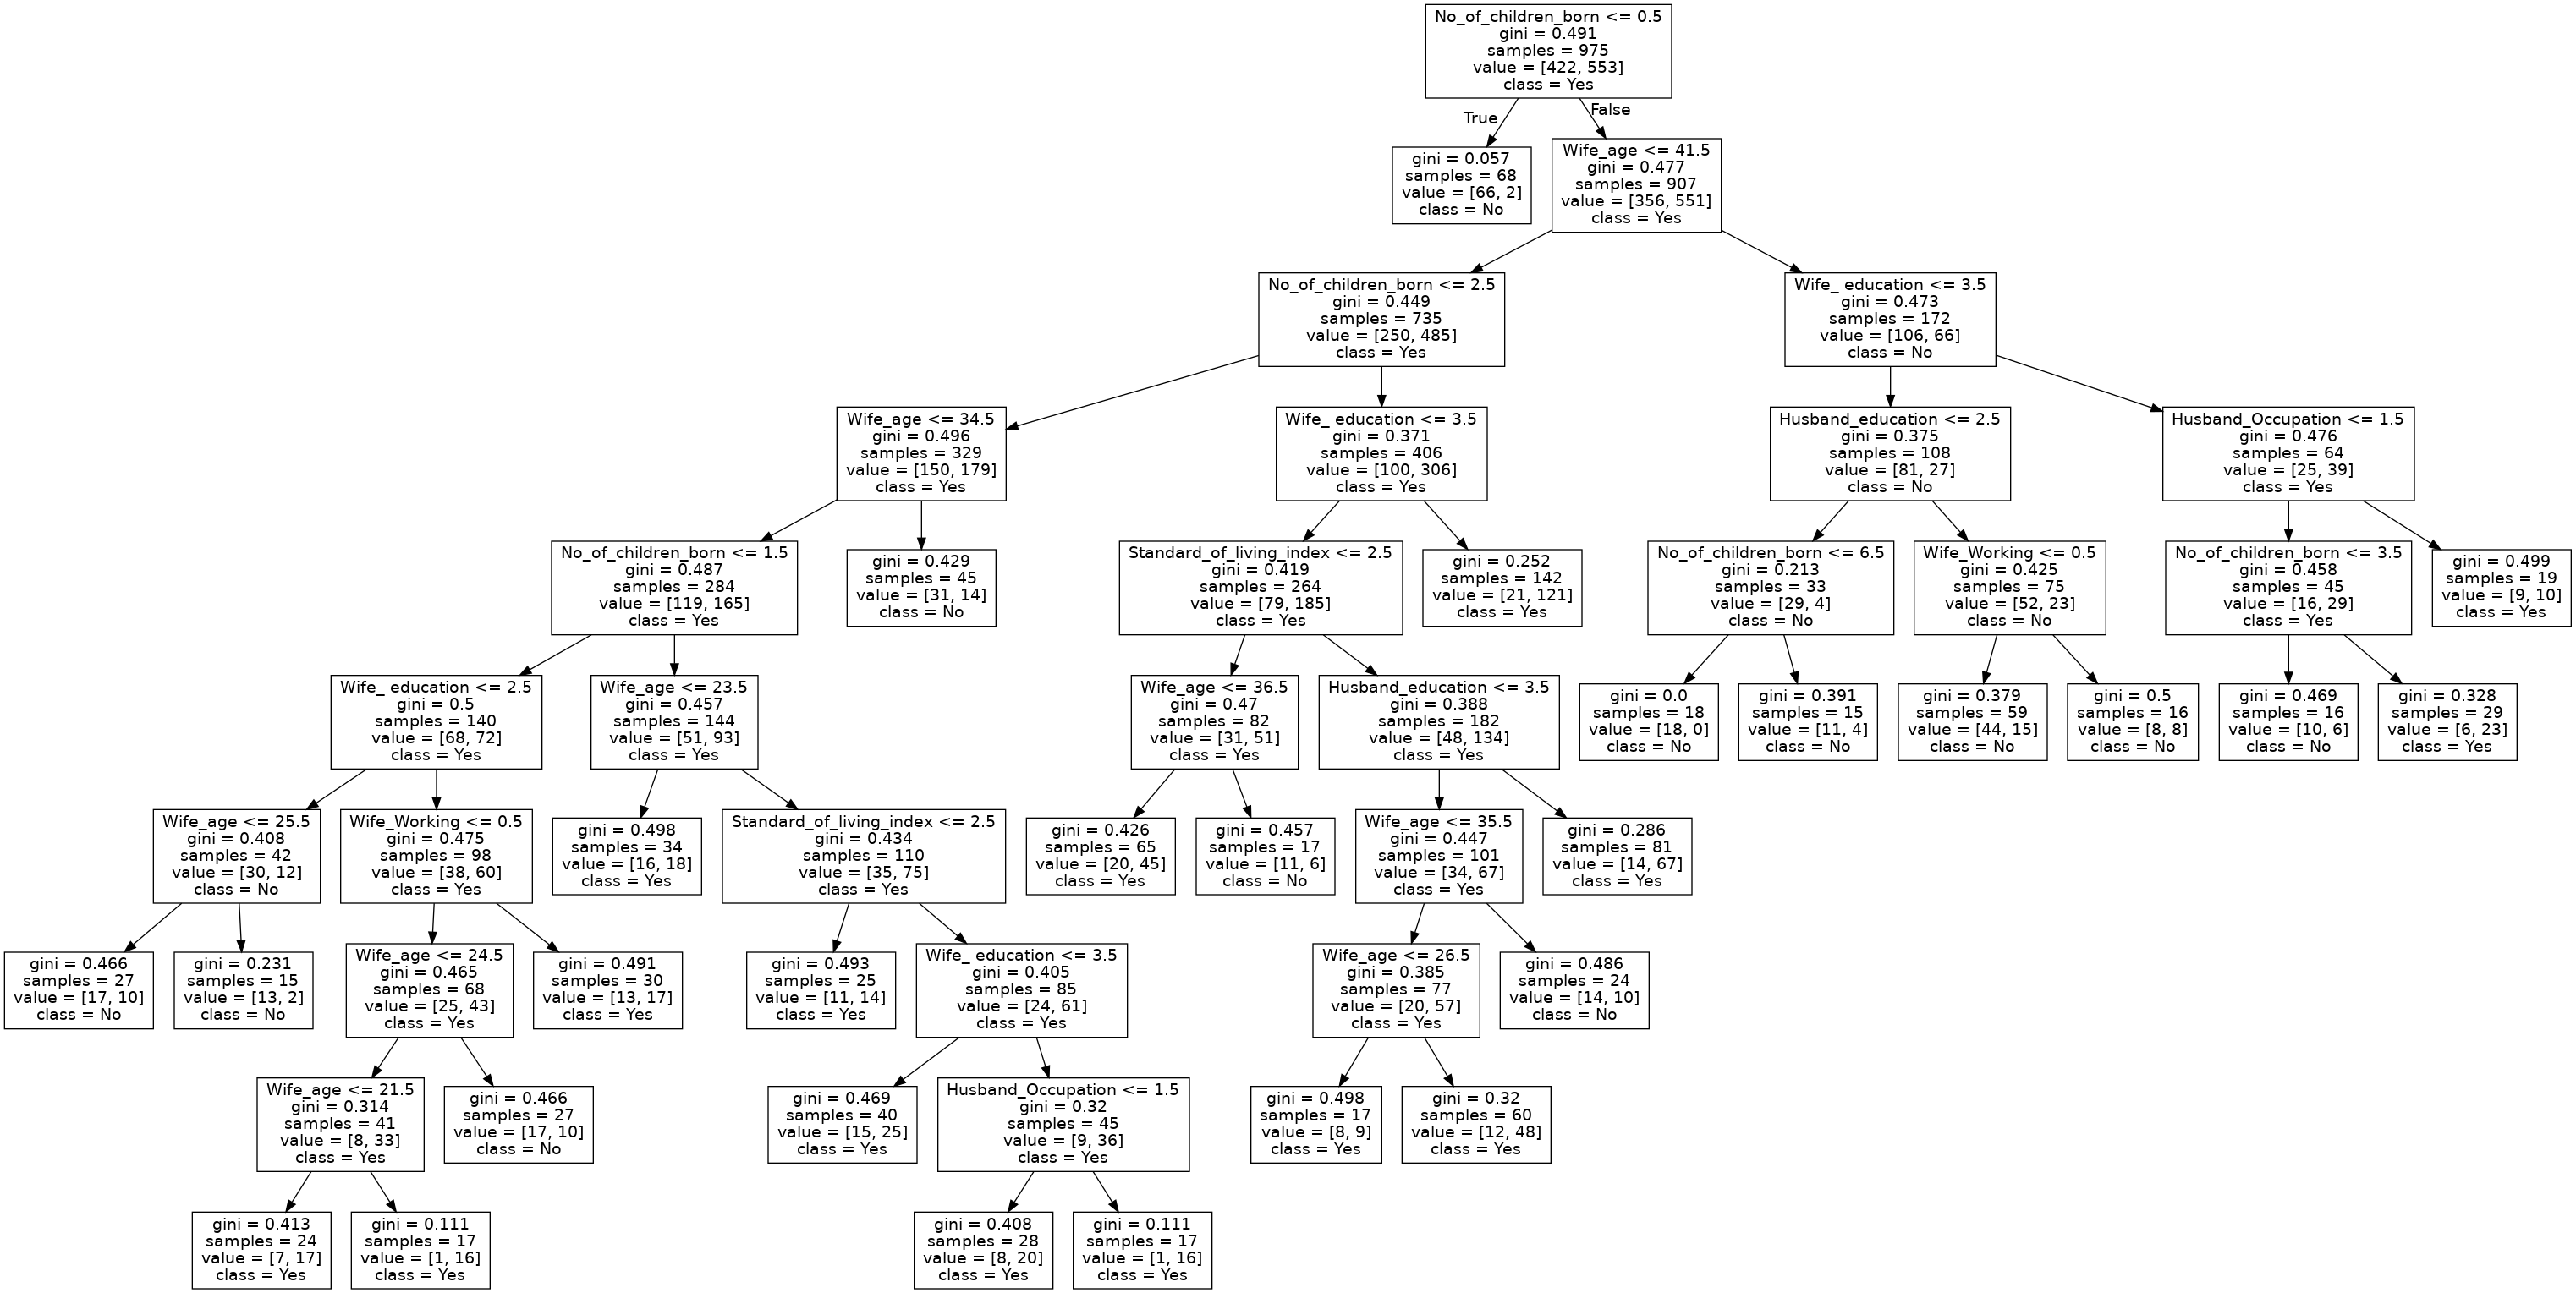